<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, 24th October, 2025 (Amsterdam time)</font> 
</center>

<br><br>

***

<br><br>

<center>

Student1 ID: 16124006 \
Student1 Name: Ippokratis Pantelidis

Student2 ID: 16300645 \
Student2 Name: Robert-Ștefan Sofroni

Student3 ID: 14339617 \
Student3 Name: Andor Károly Bodgál

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

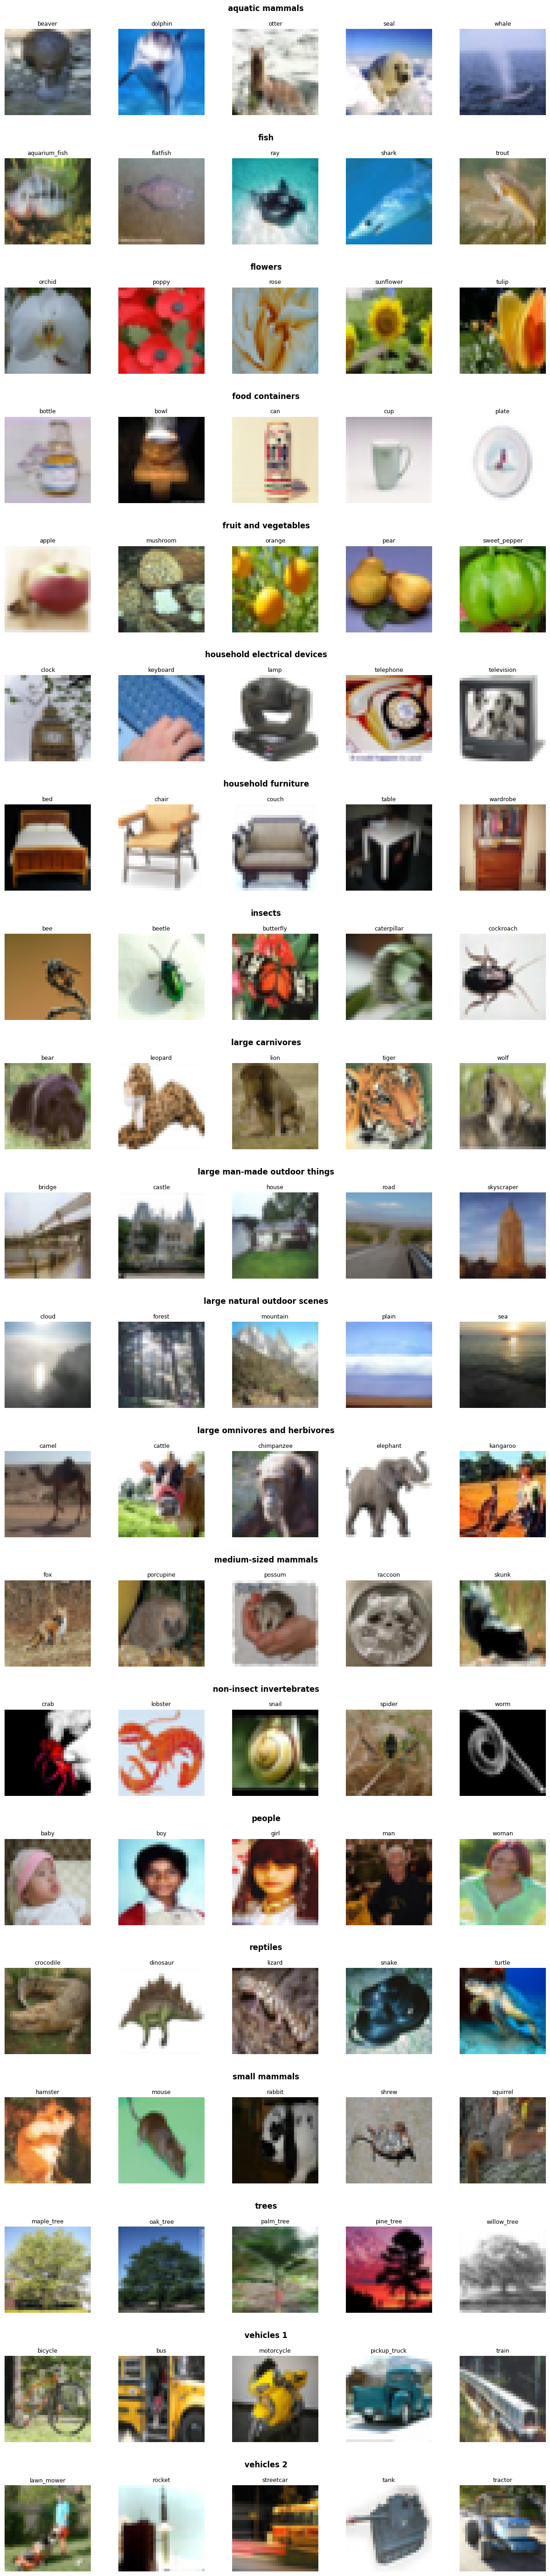

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_cifar100_classes(train_set, superclasses, classes_per_row=5):
    """
    Visualize CIFAR-100 superclasses and their subclasses.
    Each row corresponds to one superclass, with a centered title just above it.
    Images are large, evenly spaced vertically, and tightly aligned horizontally.
    """
    class_to_idx = train_set.class_to_idx
    num_rows = len(superclasses)

    fig_height = num_rows * 3.6
    fig_width = classes_per_row * 3.2

    fig, axes = plt.subplots(
        num_rows, classes_per_row,
        figsize=(fig_width, fig_height),
        constrained_layout=False
    )

    # No horizontal gaps, modest vertical spacing between rows
    plt.subplots_adjust(wspace=0.0, hspace=0.5)

    if num_rows == 1:
        axes = np.expand_dims(axes, 0)

    for row_idx, (superclass, subclasses) in enumerate(superclasses.items()):
        # Dynamically place title slightly above each row
        bbox = axes[row_idx, 0].get_position()
        title_y = bbox.y1 + 0.005

        fig.text(
            0.5,
            title_y,
            superclass,
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

        for col_idx in range(classes_per_row):
            ax = axes[row_idx, col_idx]

            if col_idx < len(subclasses):
                subclass = subclasses[col_idx]
                class_idx = class_to_idx[subclass]

                # Find one example image for that class
                img_idx = np.where(np.array(train_set.targets) == class_idx)[0][0]
                img, _ = train_set[img_idx]

                # Unnormalize tensor image
                if torch.is_tensor(img):
                    img = img / 2 + 0.5
                    np_img = img.numpy().transpose((1, 2, 0))
                else:
                    np_img = np.array(img)

                ax.imshow(np_img)
                ax.set_title(subclass, fontsize=9)
                ax.axis('off')
            else:
                ax.axis('off')

    plt.show()

visualize_cifar100_classes(train_set, superclasses)

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [4]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''
        super(TwoLayerNet, self).__init__()

        # First fully connected layer: input → hidden
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Second fully connected layer: hidden → output (class scores)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # Flatten the input image: (B, 3, 32, 32) → (B, 3072)
        x = x.view(x.size(0), -1)

        # Hidden layer with ReLU activation
        x = F.relu(self.fc1(x))

        # Output layer (raw class scores, no softmax — handled by loss)
        x = self.fc2(x)

        return x

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model (LeNet-inspired).

        Args:
            None
        '''
        super(ConvNet, self).__init__()

        # Convolutional feature extractor
        # Layer C1: input = 3x32x32 → output = 6x28x28 (kernel 5x5)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)

        # Layer C2: input = 6x14x14 → output = 16x10x10 (after pooling)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)

        # Layer C3: input = 16x5x5 → output = 120x1x1 (after pooling)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)

        # Fully connected classifier
        # F5 layer: 120 → 84 (LeNet’s classic F5 size)
        self.fc1 = nn.Linear(120, 84)

        # F6 (output) layer: 84 → 100 (CIFAR-100 has 100 classes)
        self.fc2 = nn.Linear(84, 100)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # Convolution + Tanh + AvgPool
        x = F.tanh(self.conv1(x))
        x = F.avg_pool2d(x, 2)   # 32→28→14

        x = F.tanh(self.conv2(x))
        x = F.avg_pool2d(x, 2)   # 14→10→5

        x = F.tanh(self.conv3(x))  # 5→1 (output 120x1x1)

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # (B,120)

        # Fully connected layers with Tanh activations
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [6]:
class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        super(CIFAR100_loader, self).__init__()

        # Load underlying torchvision dataset
        self.dataset = torchvision.datasets.CIFAR100(
            root=root, train=train, transform=None, download=download
        )
        self.transform = transform

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        return len(self.dataset)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        img, label = self.dataset[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

In [7]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomCrop(32, padding=4),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ])

    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ])

    return {'train': train_transform, 'validation': val_transform, 'test': test_transform}

In [8]:
import torch.optim as optim

def create_optimizer(model, optimizer_name="Adam", learning_rate=0.001, weight_decay=0.0, momentum=0.9):
    '''
    Creates a customizable optimizer for the given model.

    Args:
        model (torch.nn.Module): The neural network model.
        optimizer_name (str): The name of the optimizer ('Adam', 'SGD', or 'RMSprop').
        learning_rate (float): The learning rate for the optimizer.
        weight_decay (float): Weight decay (L2 regularization).
        momentum (float): Momentum (used for SGD and RMSprop).

    Returns:
        torch.optim.Optimizer: The configured optimizer.
    '''
    optimizer_name = optimizer_name.lower()

    if optimizer_name == "adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    print(f"Using {optimizer_name.upper()} optimizer | LR={learning_rate}, Weight Decay={weight_decay}, Momentum={momentum}")
    return optimizer

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [ ]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [10]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [11]:
from tqdm import tqdm
import torch
import torch.nn as nn

def train(
    net,
    train_loader,
    criterion,
    optimizer,
    val_loader=None,
    patience=5,
    epochs=100,
    early_stopping=False
):
    '''
    Trains the neural network model with early stopping and tracks losses and accuracies.

    Args:
        net (torch.nn.Module): The model to train.
        train_loader (DataLoader): Data loader for training set.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer for training.
        val_loader (DataLoader, optional): Validation loader for early stopping.
        patience (int): Number of epochs to wait without improvement before stopping.
        epochs (int): Maximum number of training epochs.
        early_stopping (bool): Whether to use early stopping.

    Returns:
        tuple: (train_losses, val_losses, train_accuracies, val_accuracies)
    '''
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    best_loss = float('inf')
    patience_counter = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        net.train()
        running_loss, correct_train, total_train = 0.0, 0, 0

        # --- Training loop ---
        for images, labels in tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}%")

        # --- Validation loop ---
        if val_loader is not None:
            net.eval()
            val_loss, correct_val, total_val = 0.0, 0, 0
            with torch.no_grad():
                for val_images, val_labels in val_loader:
                    val_images, val_labels = val_images.to(device), val_labels.to(device)
                    val_outputs = net(val_images)
                    val_loss += criterion(val_outputs, val_labels).item()
                    _, val_pred = torch.max(val_outputs, 1)
                    total_val += val_labels.size(0)
                    correct_val += (val_pred == val_labels).sum().item()

            avg_val_loss = val_loss / len(val_loader)
            val_acc = 100 * correct_val / total_val
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_acc)

            print(f"Validation Loss: {avg_val_loss:.4f} | Validation Acc: {val_acc:.2f}%")

            # --- Early stopping ---
            if early_stopping:
                if avg_val_loss < best_loss:
                    best_loss = avg_val_loss
                    patience_counter = 0
                    torch.save(net.state_dict(), "best_model.pth")
                else:
                    patience_counter += 1
                    print(f"No improvement ({patience_counter}/{patience})")

                if patience_counter >= patience:
                    print("Early stopping triggered.")
                    break

    print("Training complete.")
    return train_losses, val_losses, train_accuracies, val_accuracies

First, initialize the datasets and data loaders for both models.

In [ ]:
from torch.utils.data import DataLoader, Subset
import torch
import torchvision

# --- 1. Create data augmentation transforms ---
transforms_dict = create_transforms()

# --- 2. Load the full CIFAR-100 training set ---
full_dataset = torchvision.datasets.CIFAR100(
    root='./data',
    train=True,
    download=True,
    transform=None 
)

# --- 3. Split train/validation indices ---
val_ratio = 0.1  # 10% validation
train_size = int((1 - val_ratio) * len(full_dataset))
val_size = len(full_dataset) - train_size

seed = 42
generator = torch.Generator().manual_seed(seed)
train_subset, val_subset = torch.utils.data.random_split(
    range(len(full_dataset)),
    [train_size, val_size],
    generator=generator
)

# --- 4. Create CIFAR100_loader datasets with proper transforms ---
train_base = CIFAR100_loader(
    root='./data',
    train=True,
    transform=transforms_dict['train'],
    download=False
)

val_base = CIFAR100_loader(
    root='./data',
    train=True,
    transform=transforms_dict['validation'],
    download=False
)

# --- 5. Use Subset to restrict to split indices ---
train_dataset = Subset(train_base, train_subset)
val_dataset = Subset(val_base, val_subset)

# --- 6. Create test dataset ---
test_dataset = CIFAR100_loader(
    root='./data',
    train=False,
    transform=transforms_dict['test'],
    download=False
)

# --- 7. DataLoaders ---
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=64, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=64, shuffle=False, num_workers=2)

# --- 8. Print sizes ---
print(f"Training samples:   {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples:    {len(test_dataset)}")

Training samples:   45000
Validation samples: 5000
Testing samples:    10000


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [13]:
# Model parameters
input_size = 3 * 32 * 32   # 3072 input features
hidden_size = 512           # can be tuned later
num_classes = 100

# Initialize model, loss function, and optimizer
two_layer_net = TwoLayerNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(two_layer_net, "Adam", learning_rate=0.001)

# Train the network
two_layer_train_loss, two_layer_val_loss, \
two_layer_train_acc, two_layer_val_acc = train(
    net=two_layer_net,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    val_loader=val_loader,
    patience=5,
    epochs=50,
    early_stopping=True
)

# Load the best model based on validation loss
two_layer_net.load_state_dict(torch.load("best-two-layer-net.pth"))
two_layer_net.eval()

# Validate the network
validate(two_layer_net, test_loader)
validate_per_class(two_layer_net, test_loader, classes)

Using ADAM optimizer | LR=0.001, Weight Decay=0.0, Momentum=0.9


Epoch [1/50] - Train Loss: 4.0679 | Train Acc: 9.13%


Validation Loss: 4.9591 | Validation Acc: 11.16%


Epoch [2/50] - Train Loss: 3.8122 | Train Acc: 12.98%


Validation Loss: 5.2765 | Validation Acc: 11.78%
No improvement (1/5)


Epoch [3/50] - Train Loss: 3.7311 | Train Acc: 14.69%


Validation Loss: 6.1839 | Validation Acc: 12.32%
No improvement (2/5)


Epoch [4/50] - Train Loss: 3.6656 | Train Acc: 15.90%


Validation Loss: 6.6034 | Validation Acc: 12.90%
No improvement (3/5)


Epoch [5/50] - Train Loss: 3.6341 | Train Acc: 16.52%


Validation Loss: 6.1037 | Validation Acc: 13.60%
No improvement (4/5)


Epoch [6/50] - Train Loss: 3.5955 | Train Acc: 17.37%


Validation Loss: 6.7736 | Validation Acc: 12.46%
No improvement (5/5)
Early stopping triggered.
Training complete.
Accuracy of the network on the test images: 10.41 %
Accuracy of apple : 40.00 %
Accuracy of aquarium_fish : 25.00 %
Accuracy of baby  : 6.00 %
Accuracy of bear  : 2.00 %
Accuracy of beaver : 4.00 %
Accuracy of bed   : 3.00 %
Accuracy of bee   : 3.00 %
Accuracy of beetle : 0.00 %
Accuracy of bicycle : 1.00 %
Accuracy of bottle : 26.00 %
Accuracy of bowl  : 0.00 %
Accuracy of boy   : 7.00 %
Accuracy of bridge : 17.00 %
Accuracy of bus   : 7.00 %
Accuracy of butterfly : 11.00 %
Accuracy of camel : 0.00 %
Accuracy of can   : 3.00 %
Accuracy of castle : 39.00 %
Accuracy of caterpillar : 2.00 %
Accuracy of cattle : 0.00 %
Accuracy of chair : 50.00 %
Accuracy of chimpanzee : 21.00 %
Accuracy of clock : 0.00 %
Accuracy of cloud : 9.00 %
Accuracy of cockroach : 8.00 %
Accuracy of couch : 3.00 %
Accuracy of crab  : 4.00 %
Accuracy of crocodile : 1.00 %
Accuracy of cup   : 15.00 %
Ac

In [ ]:
# Show model's architecture
two_layer_net

TwoLayerNet(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=100, bias=True)
)

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [16]:
# Initialize ConvNet, loss function, and optimizer
conv_net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(conv_net, "Adam", learning_rate=0.001)

# Train the network
conv_net_train_loss, conv_net_val_loss, \
conv_net_train_acc, conv_net_val_acc = train(
    net=conv_net,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    val_loader=val_loader,
    patience=5,
    epochs=50,
    early_stopping=True
)

# Load the best model based on validation loss
conv_net.load_state_dict(torch.load("best-conv-net.pth"))
conv_net.eval()

# Validate the network
validate(conv_net, test_loader)
validate_per_class(conv_net, test_loader, classes)

Using ADAM optimizer | LR=0.001, Weight Decay=0.0, Momentum=0.9


Epoch [1/50]:   0%|          | 0/704 [00:00<?, ?it/s]

Epoch [1/50] - Train Loss: 4.0591 | Train Acc: 8.26%


Validation Loss: 3.7824 | Validation Acc: 12.94%


Epoch [2/50] - Train Loss: 3.7909 | Train Acc: 12.27%


Validation Loss: 3.6225 | Validation Acc: 15.86%


Epoch [3/50] - Train Loss: 3.6684 | Train Acc: 14.24%


Validation Loss: 3.5065 | Validation Acc: 17.38%


Epoch [4/50] - Train Loss: 3.5862 | Train Acc: 15.79%


Validation Loss: 3.4482 | Validation Acc: 18.42%


Epoch [5/50] - Train Loss: 3.5166 | Train Acc: 16.58%


Validation Loss: 3.3850 | Validation Acc: 19.68%


Epoch [6/50] - Train Loss: 3.4583 | Train Acc: 17.78%


Validation Loss: 3.3333 | Validation Acc: 20.52%


Epoch [7/50] - Train Loss: 3.4145 | Train Acc: 18.28%


Validation Loss: 3.2978 | Validation Acc: 20.96%


Epoch [8/50] - Train Loss: 3.3842 | Train Acc: 18.99%


Validation Loss: 3.2671 | Validation Acc: 22.52%


Epoch [9/50] - Train Loss: 3.3502 | Train Acc: 19.45%


Validation Loss: 3.2511 | Validation Acc: 22.44%


Epoch [10/50] - Train Loss: 3.3292 | Train Acc: 19.73%


Validation Loss: 3.2146 | Validation Acc: 22.92%


Epoch [11/50] - Train Loss: 3.2963 | Train Acc: 20.38%


Validation Loss: 3.2261 | Validation Acc: 22.76%
No improvement (1/5)


Epoch [12/50] - Train Loss: 3.2743 | Train Acc: 20.79%
Validation Loss: 3.1958 | Validation Acc: 23.58%


Epoch [13/50] - Train Loss: 3.2525 | Train Acc: 21.34%


Validation Loss: 3.1608 | Validation Acc: 24.28%


Epoch [14/50] - Train Loss: 3.2374 | Train Acc: 21.57%


Validation Loss: 3.1514 | Validation Acc: 23.60%


Epoch [15/50] - Train Loss: 3.2201 | Train Acc: 21.69%


Validation Loss: 3.1276 | Validation Acc: 24.38%


Epoch [16/50] - Train Loss: 3.2042 | Train Acc: 22.16%


Validation Loss: 3.1093 | Validation Acc: 24.68%


Epoch [17/50] - Train Loss: 3.1879 | Train Acc: 22.38%


Validation Loss: 3.0998 | Validation Acc: 25.62%


Epoch [18/50] - Train Loss: 3.1733 | Train Acc: 22.85%


Validation Loss: 3.1058 | Validation Acc: 24.96%
No improvement (1/5)


Epoch [19/50] - Train Loss: 3.1577 | Train Acc: 22.94%


Validation Loss: 3.1380 | Validation Acc: 24.00%
No improvement (2/5)


Epoch [20/50] - Train Loss: 3.1480 | Train Acc: 23.30%


Validation Loss: 3.0683 | Validation Acc: 25.36%


Epoch [21/50] - Train Loss: 3.1276 | Train Acc: 23.55%


Validation Loss: 3.0697 | Validation Acc: 25.74%
No improvement (1/5)


Epoch [22/50] - Train Loss: 3.1160 | Train Acc: 23.82%


Validation Loss: 3.0448 | Validation Acc: 25.96%


Epoch [23/50] - Train Loss: 3.1039 | Train Acc: 24.27%


Validation Loss: 3.0492 | Validation Acc: 26.22%
No improvement (1/5)


Epoch [24/50] - Train Loss: 3.0909 | Train Acc: 24.12%


Validation Loss: 3.0473 | Validation Acc: 25.50%
No improvement (2/5)


Epoch [25/50] - Train Loss: 3.0830 | Train Acc: 24.44%


Validation Loss: 3.0267 | Validation Acc: 26.34%


Epoch [26/50] - Train Loss: 3.0756 | Train Acc: 24.50%


Validation Loss: 3.0245 | Validation Acc: 25.60%


Epoch [27/50] - Train Loss: 3.0566 | Train Acc: 24.95%


Validation Loss: 3.0016 | Validation Acc: 27.06%


Epoch [28/50] - Train Loss: 3.0592 | Train Acc: 24.96%


Validation Loss: 2.9885 | Validation Acc: 27.10%


Epoch [29/50] - Train Loss: 3.0455 | Train Acc: 25.16%


Validation Loss: 2.9839 | Validation Acc: 27.14%


Epoch [30/50] - Train Loss: 3.0326 | Train Acc: 25.19%


Validation Loss: 2.9974 | Validation Acc: 26.58%
No improvement (1/5)


Epoch [31/50] - Train Loss: 3.0226 | Train Acc: 25.50%


Validation Loss: 2.9664 | Validation Acc: 27.54%


Epoch [32/50] - Train Loss: 3.0084 | Train Acc: 25.78%


Validation Loss: 2.9780 | Validation Acc: 26.82%
No improvement (1/5)


Epoch [33/50] - Train Loss: 3.0026 | Train Acc: 25.77%


Validation Loss: 2.9586 | Validation Acc: 27.60%


Epoch [34/50] - Train Loss: 2.9996 | Train Acc: 26.12%


Validation Loss: 2.9534 | Validation Acc: 27.74%


Epoch [35/50] - Train Loss: 2.9973 | Train Acc: 26.04%


Validation Loss: 2.9174 | Validation Acc: 28.16%


Epoch [36/50] - Train Loss: 2.9808 | Train Acc: 26.35%


Validation Loss: 2.9282 | Validation Acc: 28.20%
No improvement (1/5)


Epoch [37/50] - Train Loss: 2.9776 | Train Acc: 26.47%


Validation Loss: 2.9287 | Validation Acc: 28.80%
No improvement (2/5)


Epoch [38/50] - Train Loss: 2.9764 | Train Acc: 26.37%


Validation Loss: 2.9599 | Validation Acc: 27.52%
No improvement (3/5)


Epoch [39/50] - Train Loss: 2.9584 | Train Acc: 26.81%


Validation Loss: 2.9216 | Validation Acc: 28.24%
No improvement (4/5)


Epoch [40/50] - Train Loss: 2.9538 | Train Acc: 26.78%


Validation Loss: 2.9109 | Validation Acc: 28.38%


Epoch [41/50] - Train Loss: 2.9537 | Train Acc: 27.07%


Validation Loss: 2.9322 | Validation Acc: 28.34%
No improvement (1/5)


Epoch [42/50] - Train Loss: 2.9498 | Train Acc: 27.02%


Validation Loss: 2.8995 | Validation Acc: 29.08%


Epoch [43/50] - Train Loss: 2.9332 | Train Acc: 27.08%


Validation Loss: 2.9201 | Validation Acc: 28.40%
No improvement (1/5)


Epoch [44/50] - Train Loss: 2.9382 | Train Acc: 27.14%


Validation Loss: 2.9017 | Validation Acc: 28.80%
No improvement (2/5)


Epoch [45/50] - Train Loss: 2.9263 | Train Acc: 27.57%


Validation Loss: 2.8928 | Validation Acc: 28.90%


Epoch [46/50] - Train Loss: 2.9131 | Train Acc: 27.73%


Validation Loss: 2.8876 | Validation Acc: 28.98%


Epoch [47/50] - Train Loss: 2.9134 | Train Acc: 27.64%


Validation Loss: 2.8945 | Validation Acc: 28.52%
No improvement (1/5)


Epoch [48/50] - Train Loss: 2.9060 | Train Acc: 27.98%


Validation Loss: 2.8740 | Validation Acc: 29.66%


Epoch [49/50] - Train Loss: 2.9042 | Train Acc: 27.91%


Validation Loss: 2.8686 | Validation Acc: 29.22%


Epoch [50/50] - Train Loss: 2.8993 | Train Acc: 28.09%


Validation Loss: 2.8792 | Validation Acc: 29.44%
No improvement (1/5)
Training complete.
Accuracy of the network on the test images: 28.42 %
Accuracy of apple : 51.00 %
Accuracy of aquarium_fish : 42.00 %
Accuracy of baby  : 20.00 %
Accuracy of bear  : 16.00 %
Accuracy of beaver : 4.00 %
Accuracy of bed   : 24.00 %
Accuracy of bee   : 18.00 %
Accuracy of beetle : 30.00 %
Accuracy of bicycle : 26.00 %
Accuracy of bottle : 28.00 %
Accuracy of bowl  : 6.00 %
Accuracy of boy   : 20.00 %
Accuracy of bridge : 40.00 %
Accuracy of bus   : 22.00 %
Accuracy of butterfly : 14.00 %
Accuracy of camel : 14.00 %
Accuracy of can   : 32.00 %
Accuracy of castle : 53.00 %
Accuracy of caterpillar : 32.00 %
Accuracy of cattle : 20.00 %
Accuracy of chair : 63.00 %
Accuracy of chimpanzee : 58.00 %
Accuracy of clock : 19.00 %
Accuracy of cloud : 51.00 %
Accuracy of cockroach : 64.00 %
Accuracy of couch : 32.00 %
Accuracy of crab  : 11.00 %
Accuracy of crocodile : 20.00 %
Accuracy of cup   : 36.00 %
Accuracy o

In [ ]:
# Show model's architecture
conv_net

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=100, bias=True)
)

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

#### Hyperparameter Tuning

In [222]:
def prepare_dataloaders(brightness, contrast, saturation, hflip_prob, batch_size):
    """
    Creates and returns CIFAR-100 train and validation dataloaders with specified augmentation settings.
    """
    # Create data augmentation transforms
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=hflip_prob),
        transforms.RandomCrop(32, padding=4),
        transforms.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load the CIFAR-100 dataset once
    full_dataset = torchvision.datasets.CIFAR100(
        root='./data', train=True, download=True, transform=None
    )

    # Split into train/val subsets
    val_ratio = 0.1
    train_size = int((1 - val_ratio) * len(full_dataset))
    val_size = len(full_dataset) - train_size
    generator = torch.Generator().manual_seed(42)
    train_subset, val_subset = torch.utils.data.random_split(
        full_dataset, [train_size, val_size], generator=generator
    )

    # Wrap using CIFAR100_loader
    train_base = CIFAR100_loader(root='./data', train=True, transform=train_transform)
    val_base   = CIFAR100_loader(root='./data', train=True, transform=val_transform)

    # Subset selection
    train_dataset = Subset(train_base, train_subset.indices)
    val_dataset   = Subset(val_base, val_subset.indices)

    # DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


def run_trial(trial, model_type):
    """
    Defines the Optuna objective function for one trial.
    Performs hyperparameter selection, training, validation, and pruning.
    Extended: tunes ConvNet kernel sizes and filters if model_type='convnet'.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\nStarting new trial ({model_type.upper()}) — Trial #{trial.number + 1}")

    # Base Hyperparameter Search Space
    lr = trial.suggest_categorical("lr", [1e-4, 5e-4, 1e-3, 5e-3])
    weight_decay = trial.suggest_categorical("weight_decay", [1e-6, 1e-5, 1e-4, 5e-4])
    batch_size = trial.suggest_categorical("batch_size", [64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD"])
    epochs = trial.suggest_categorical("epochs", [15, 20, 25, 30, 35, 40])

    # Model-Specific Hyperparameters
    if model_type == "two_layer":
        hidden_size = trial.suggest_categorical("hidden_size", [256, 512, 1024])
    elif model_type == "convnet":
        # Tune ConvNet architecture
        num_filters_1 = trial.suggest_categorical("num_filters_1", [6, 8, 12, 16])
        num_filters_2 = trial.suggest_categorical("num_filters_2", [16, 24, 32, 48])
        num_filters_3 = trial.suggest_categorical("num_filters_3", [64, 96, 120])
        kernel_size_1 = trial.suggest_categorical("kernel_size_1", [1, 3, 5])
        kernel_size_2 = trial.suggest_categorical("kernel_size_2", [1, 3, 5])
        kernel_size_3 = trial.suggest_categorical("kernel_size_3", [1, 3, 5])

    # Data Augmentation Hyperparameters
    brightness = trial.suggest_categorical("brightness", [0.1, 0.2, 0.3, 0.4])
    contrast   = trial.suggest_categorical("contrast", [0.1, 0.2, 0.3, 0.4])
    saturation = trial.suggest_categorical("saturation", [0.1, 0.2, 0.3, 0.4])
    hflip_prob = trial.suggest_categorical("hflip_prob", [0.3, 0.4, 0.5, 0.6, 0.7])

    # Print summary of the trial setup
    print(f"→ lr={lr:.5f}, weight_decay={weight_decay:.1e}, batch={batch_size}, "
          f"optimizer={optimizer_name}, epochs={epochs}")
    if model_type == "two_layer":
        print(f"→ hidden_size={hidden_size}")
    if model_type == "convnet":
        print(f"→ filters=({num_filters_1}, {num_filters_2}, {num_filters_3}), "
              f"kernels=({kernel_size_1}, {kernel_size_2}, {kernel_size_3})")
    print(f"→ transforms: brightness={brightness:.2f}, contrast={contrast:.2f}, "
          f"saturation={saturation:.2f}, hflip_prob={hflip_prob:.2f}")

    # Data Preparation
    train_loader, val_loader = prepare_dataloaders(brightness, contrast, saturation, hflip_prob, batch_size)

    # Model Definition
    if model_type == "two_layer":
        input_size = 3 * 32 * 32
        model = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, num_classes=100).to(device)

    elif model_type == "convnet":
        class TunableConvNet(nn.Module):
            def __init__(self):
                super(TunableConvNet, self).__init__()
                self.conv1 = nn.Conv2d(3, num_filters_1, kernel_size=kernel_size_1)
                self.conv2 = nn.Conv2d(num_filters_1, num_filters_2, kernel_size=kernel_size_2)
                self.conv3 = nn.Conv2d(num_filters_2, num_filters_3, kernel_size=kernel_size_3)

                # Dynamically compute flattened feature size after conv layers
                with torch.no_grad():
                    dummy_input = torch.zeros(1, 3, 32, 32)
                    out = self._forward_features(dummy_input)
                    self.flatten_dim = out.view(1, -1).size(1)

                # Now we can safely define fully connected layers
                self.fc1 = nn.Linear(self.flatten_dim, 84)
                self.fc2 = nn.Linear(84, 100)

            def _forward_features(self, x):
                """Feature extractor up to flattening."""
                x = torch.tanh(self.conv1(x))
                x = F.avg_pool2d(x, 2)
                x = torch.tanh(self.conv2(x))
                x = F.avg_pool2d(x, 2)
                x = torch.tanh(self.conv3(x))
                return x

            def forward(self, x):
                x = self._forward_features(x)
                x = x.view(x.size(0), -1)
                x = torch.tanh(self.fc1(x))
                x = self.fc2(x)
                return x

        model = TunableConvNet().to(device)

    else:
        raise ValueError("Invalid model_type. Must be 'two_layer' or 'convnet'.")

    # Optimization Setup
    criterion = nn.CrossEntropyLoss()
    optimizer = (optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
                 if optimizer_name == "Adam"
                 else optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay))

    # Training Loop with Optuna Pruning
    best_val_acc = 0.0
    print(f"\nBeginning training for {epochs} epochs...\n")

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for batch_idx, (images, labels) in enumerate(train_loader, start=1):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Progress print
            if batch_idx % 10 == 0 or batch_idx == len(train_loader):
                avg_loss = running_loss / batch_idx
                print(f"[Epoch {epoch+1:02d}/{epochs}] Batch {batch_idx:03d}/{len(train_loader)} "
                      f"| Avg Train Loss: {avg_loss:.4f}", end="\r")

        # Validation lopp
        val_acc = validate(model, val_loader)
        best_val_acc = max(best_val_acc, val_acc)
        print(f"\nEpoch {epoch+1}/{epochs} complete — Val Accuracy: {val_acc:.2f}% "
              f"(Best: {best_val_acc:.2f}%)")

        # Report to Optuna
        trial.report(val_acc, step=epoch)
        if trial.should_prune():
            print(f"Trial #{trial.number + 1} pruned at epoch {epoch+1} (Val Acc: {val_acc:.2f}%)")
            raise optuna.TrialPruned()

    print(f"\nTrial #{trial.number + 1} complete — Best Validation Accuracy: {best_val_acc:.2f}%\n")
    return best_val_acc

In [ ]:
def train_optuna(model_type="two_layer", n_trials=20):
    """
    Runs Optuna hyperparameter optimization for a specified model type.
    Handles study creation, pruning setup, optimization, and reporting.
    """
    import optuna
    from optuna.pruners import MedianPruner

    print(f"\nStarting Optuna optimization for model: {model_type.upper()}")
    print(f"Number of trials: {n_trials}\n")

    # Create the Optuna study
    study = optuna.create_study(
        direction="maximize",
        pruner=MedianPruner(n_warmup_steps=3) 
    )

    # Optimize using the defined objective function
    study.optimize(lambda trial: run_trial(trial, model_type=model_type),
                   n_trials=n_trials,
                   gc_after_trial=True)

    # Print best trial summary
    print("\nOptuna optimization completed.")
    print(f"Best trial: #{study.best_trial.number + 1}")
    print(f"→ Best Validation Accuracy: {study.best_value:.2f}%")
    print("→ Best Hyperparameters:")
    for key, value in study.best_trial.params.items():
        print(f"   {key}: {value}")

    return study

In [231]:
# Optimize the TwoLayerNet
study_two_layer_net = train_optuna(model_type="two_layer", n_trials=50)

[I 2025-10-27 02:27:54,818] A new study created in memory with name: no-name-928305aa-c951-411e-b695-280086c617b2



Starting Optuna optimization for model: TWO_LAYER
Number of trials: 50


Starting new trial (TWO_LAYER) — Trial #1
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=512
→ transforms: brightness=0.20, contrast=0.30, saturation=0.20, hflip_prob=0.70

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1553
Epoch 1/40 complete — Val Accuracy: 12.16% (Best: 12.16%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8899
Epoch 2/40 complete — Val Accuracy: 14.56% (Best: 14.56%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7909
Epoch 3/40 complete — Val Accuracy: 15.70% (Best: 15.70%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.7243
Epoch 4/40 complete — Val Accuracy: 16.66% (Best: 16.66%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6698
Epoch 5/40 complete — Val Accuracy: 17.22% (Best: 17.22%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.6289
Epoch 6/40 complete — Val Accuracy: 18.14% (Best: 18.14%)
[Epoch 07/

[I 2025-10-27 02:37:41,831] Trial 0 finished with value: 24.3 and parameters: {'lr': 0.0001, 'weight_decay': 0.0001, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 512, 'brightness': 0.2, 'contrast': 0.3, 'saturation': 0.2, 'hflip_prob': 0.7}. Best is trial 0 with value: 24.3.



Epoch 40/40 complete — Val Accuracy: 23.80% (Best: 24.30%)

Trial #1 complete — Best Validation Accuracy: 24.30%


Starting new trial (TWO_LAYER) — Trial #2
→ lr=0.00050, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=15
→ hidden_size=256
→ transforms: brightness=0.10, contrast=0.40, saturation=0.30, hflip_prob=0.50

Beginning training for 15 epochs...

[Epoch 01/15] Batch 704/704 | Avg Train Loss: 4.5027
Epoch 1/15 complete — Val Accuracy: 6.28% (Best: 6.28%)
[Epoch 02/15] Batch 704/704 | Avg Train Loss: 4.2833
Epoch 2/15 complete — Val Accuracy: 7.64% (Best: 7.64%)
[Epoch 03/15] Batch 704/704 | Avg Train Loss: 4.1348
Epoch 3/15 complete — Val Accuracy: 8.74% (Best: 8.74%)
[Epoch 04/15] Batch 704/704 | Avg Train Loss: 4.0503
Epoch 4/15 complete — Val Accuracy: 9.64% (Best: 9.64%)
[Epoch 05/15] Batch 704/704 | Avg Train Loss: 3.9972
Epoch 5/15 complete — Val Accuracy: 10.30% (Best: 10.30%)
[Epoch 06/15] Batch 704/704 | Avg Train Loss: 3.9536
Epoch 6/15 complete — Val Accuracy: 

[I 2025-10-27 02:41:25,990] Trial 1 finished with value: 15.54 and parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'batch_size': 64, 'optimizer': 'SGD', 'epochs': 15, 'hidden_size': 256, 'brightness': 0.1, 'contrast': 0.4, 'saturation': 0.3, 'hflip_prob': 0.5}. Best is trial 0 with value: 24.3.



Epoch 15/15 complete — Val Accuracy: 15.54% (Best: 15.54%)

Trial #2 complete — Best Validation Accuracy: 15.54%


Starting new trial (TWO_LAYER) — Trial #3
→ lr=0.00100, weight_decay=1.0e-05, batch=128, optimizer=SGD, epochs=30
→ hidden_size=512
→ transforms: brightness=0.40, contrast=0.10, saturation=0.30, hflip_prob=0.40

Beginning training for 30 epochs...

[Epoch 01/30] Batch 352/352 | Avg Train Loss: 4.5166
Epoch 1/30 complete — Val Accuracy: 4.94% (Best: 4.94%)
[Epoch 02/30] Batch 352/352 | Avg Train Loss: 4.3096
Epoch 2/30 complete — Val Accuracy: 6.88% (Best: 6.88%)
[Epoch 03/30] Batch 352/352 | Avg Train Loss: 4.1696
Epoch 3/30 complete — Val Accuracy: 8.72% (Best: 8.72%)
[Epoch 04/30] Batch 352/352 | Avg Train Loss: 4.0911
Epoch 4/30 complete — Val Accuracy: 9.58% (Best: 9.58%)
[Epoch 05/30] Batch 352/352 | Avg Train Loss: 4.0344
Epoch 5/30 complete — Val Accuracy: 10.04% (Best: 10.04%)
[Epoch 06/30] Batch 352/352 | Avg Train Loss: 3.9907
Epoch 6/30 complete — Val Accuracy:

[I 2025-10-27 02:48:41,478] Trial 2 finished with value: 18.48 and parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'SGD', 'epochs': 30, 'hidden_size': 512, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.3, 'hflip_prob': 0.4}. Best is trial 0 with value: 24.3.



Epoch 30/30 complete — Val Accuracy: 18.48% (Best: 18.48%)

Trial #3 complete — Best Validation Accuracy: 18.48%


Starting new trial (TWO_LAYER) — Trial #4
→ lr=0.00010, weight_decay=1.0e-06, batch=128, optimizer=Adam, epochs=20
→ hidden_size=512
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.40

Beginning training for 20 epochs...

[Epoch 01/20] Batch 352/352 | Avg Train Loss: 4.2155
Epoch 1/20 complete — Val Accuracy: 11.34% (Best: 11.34%)
[Epoch 02/20] Batch 352/352 | Avg Train Loss: 3.9680
Epoch 2/20 complete — Val Accuracy: 14.46% (Best: 14.46%)
[Epoch 03/20] Batch 352/352 | Avg Train Loss: 3.8683
Epoch 3/20 complete — Val Accuracy: 15.20% (Best: 15.20%)
[Epoch 04/20] Batch 352/352 | Avg Train Loss: 3.8053
Epoch 4/20 complete — Val Accuracy: 16.06% (Best: 16.06%)
[Epoch 05/20] Batch 352/352 | Avg Train Loss: 3.7518
Epoch 5/20 complete — Val Accuracy: 16.86% (Best: 16.86%)
[Epoch 06/20] Batch 352/352 | Avg Train Loss: 3.7073
Epoch 6/20 complete — Val 

[I 2025-10-27 02:53:33,641] Trial 3 finished with value: 21.3 and parameters: {'lr': 0.0001, 'weight_decay': 1e-06, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 20, 'hidden_size': 512, 'brightness': 0.4, 'contrast': 0.4, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 0 with value: 24.3.



Epoch 20/20 complete — Val Accuracy: 21.30% (Best: 21.30%)

Trial #4 complete — Best Validation Accuracy: 21.30%


Starting new trial (TWO_LAYER) — Trial #5
→ lr=0.00050, weight_decay=5.0e-04, batch=64, optimizer=Adam, epochs=35
→ hidden_size=512
→ transforms: brightness=0.20, contrast=0.10, saturation=0.40, hflip_prob=0.60

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.0241
Epoch 1/35 complete — Val Accuracy: 12.88% (Best: 12.88%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 3.7641
Epoch 2/35 complete — Val Accuracy: 15.58% (Best: 15.58%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.6490
Epoch 3/35 complete — Val Accuracy: 16.88% (Best: 16.88%)
[Epoch 04/35] Batch 704/704 | Avg Train Loss: 3.5783
Epoch 4/35 complete — Val Accuracy: 17.56% (Best: 17.56%)
[Epoch 05/35] Batch 704/704 | Avg Train Loss: 3.5244
Epoch 5/35 complete — Val Accuracy: 18.46% (Best: 18.46%)
[Epoch 06/35] Batch 704/704 | Avg Train Loss: 3.4814
Epoch 6/35 complete — Val A

[I 2025-10-27 03:02:13,975] Trial 4 finished with value: 21.68 and parameters: {'lr': 0.0005, 'weight_decay': 0.0005, 'batch_size': 64, 'optimizer': 'Adam', 'epochs': 35, 'hidden_size': 512, 'brightness': 0.2, 'contrast': 0.1, 'saturation': 0.4, 'hflip_prob': 0.6}. Best is trial 0 with value: 24.3.



Epoch 35/35 complete — Val Accuracy: 21.68% (Best: 21.68%)

Trial #5 complete — Best Validation Accuracy: 21.68%


Starting new trial (TWO_LAYER) — Trial #6
→ lr=0.00100, weight_decay=1.0e-04, batch=128, optimizer=SGD, epochs=25
→ hidden_size=512
→ transforms: brightness=0.10, contrast=0.10, saturation=0.30, hflip_prob=0.50

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.4921
Epoch 1/25 complete — Val Accuracy: 6.22% (Best: 6.22%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 4.2504
Epoch 2/25 complete — Val Accuracy: 7.78% (Best: 7.78%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 4.1010
Epoch 3/25 complete — Val Accuracy: 9.54% (Best: 9.54%)


[I 2025-10-27 03:03:15,042] Trial 5 pruned. 



Epoch 4/25 complete — Val Accuracy: 9.70% (Best: 9.70%)
Trial #6 pruned at epoch 4 (Val Acc: 9.70%)

Starting new trial (TWO_LAYER) — Trial #7
→ lr=0.00100, weight_decay=1.0e-06, batch=64, optimizer=Adam, epochs=20
→ hidden_size=256
→ transforms: brightness=0.30, contrast=0.30, saturation=0.20, hflip_prob=0.60

Beginning training for 20 epochs...

[Epoch 01/20] Batch 704/704 | Avg Train Loss: 4.0892
Epoch 1/20 complete — Val Accuracy: 11.84% (Best: 11.84%)
[Epoch 02/20] Batch 704/704 | Avg Train Loss: 3.8273
Epoch 2/20 complete — Val Accuracy: 12.62% (Best: 12.62%)
[Epoch 03/20] Batch 704/704 | Avg Train Loss: 3.7360
Epoch 3/20 complete — Val Accuracy: 14.42% (Best: 14.42%)


[I 2025-10-27 03:04:17,514] Trial 6 pruned. 



Epoch 4/20 complete — Val Accuracy: 14.30% (Best: 14.42%)
Trial #7 pruned at epoch 4 (Val Acc: 14.30%)

Starting new trial (TWO_LAYER) — Trial #8
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=25
→ hidden_size=512
→ transforms: brightness=0.10, contrast=0.30, saturation=0.10, hflip_prob=0.40

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.1368
Epoch 1/25 complete — Val Accuracy: 11.92% (Best: 11.92%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.8690
Epoch 2/25 complete — Val Accuracy: 14.64% (Best: 14.64%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.7704
Epoch 3/25 complete — Val Accuracy: 16.12% (Best: 16.12%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.7066
Epoch 4/25 complete — Val Accuracy: 16.54% (Best: 16.54%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6534
Epoch 5/25 complete — Val Accuracy: 17.74% (Best: 17.74%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.6033
Epoch 6/25 complete — Val Accuracy: 1

[I 2025-10-27 03:10:21,869] Trial 7 finished with value: 23.26 and parameters: {'lr': 0.0001, 'weight_decay': 0.0001, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 25, 'hidden_size': 512, 'brightness': 0.1, 'contrast': 0.3, 'saturation': 0.1, 'hflip_prob': 0.4}. Best is trial 0 with value: 24.3.



Epoch 25/25 complete — Val Accuracy: 23.26% (Best: 23.26%)

Trial #8 complete — Best Validation Accuracy: 23.26%


Starting new trial (TWO_LAYER) — Trial #9
→ lr=0.00050, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=20
→ hidden_size=256
→ transforms: brightness=0.20, contrast=0.10, saturation=0.30, hflip_prob=0.40

Beginning training for 20 epochs...

[Epoch 01/20] Batch 704/704 | Avg Train Loss: 4.5075
Epoch 1/20 complete — Val Accuracy: 6.36% (Best: 6.36%)
[Epoch 02/20] Batch 704/704 | Avg Train Loss: 4.2863
Epoch 2/20 complete — Val Accuracy: 7.76% (Best: 7.76%)
[Epoch 03/20] Batch 704/704 | Avg Train Loss: 4.1350
Epoch 3/20 complete — Val Accuracy: 9.14% (Best: 9.14%)


[I 2025-10-27 03:11:24,011] Trial 8 pruned. 



Epoch 4/20 complete — Val Accuracy: 9.76% (Best: 9.76%)
Trial #9 pruned at epoch 4 (Val Acc: 9.76%)

Starting new trial (TWO_LAYER) — Trial #10
→ lr=0.00050, weight_decay=1.0e-04, batch=128, optimizer=SGD, epochs=15
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.60

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.5501
Epoch 1/15 complete — Val Accuracy: 5.42% (Best: 5.42%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 4.4236
Epoch 2/15 complete — Val Accuracy: 6.60% (Best: 6.60%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 4.3043
Epoch 3/15 complete — Val Accuracy: 6.96% (Best: 6.96%)


[I 2025-10-27 03:12:25,064] Trial 9 pruned. 



Epoch 4/15 complete — Val Accuracy: 8.08% (Best: 8.08%)
Trial #10 pruned at epoch 4 (Val Acc: 8.08%)

Starting new trial (TWO_LAYER) — Trial #11
→ lr=0.00500, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.20, contrast=0.30, saturation=0.10, hflip_prob=0.70

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 5.5248
Epoch 1/40 complete — Val Accuracy: 5.52% (Best: 5.52%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 5.9333
Epoch 2/40 complete — Val Accuracy: 5.92% (Best: 5.92%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 6.1706
Epoch 3/40 complete — Val Accuracy: 5.06% (Best: 5.92%)


[I 2025-10-27 03:13:26,537] Trial 10 pruned. 



Epoch 4/40 complete — Val Accuracy: 4.86% (Best: 5.92%)
Trial #11 pruned at epoch 4 (Val Acc: 4.86%)

Starting new trial (TWO_LAYER) — Trial #12
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=25
→ hidden_size=512
→ transforms: brightness=0.10, contrast=0.30, saturation=0.10, hflip_prob=0.30

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.1433
Epoch 1/25 complete — Val Accuracy: 11.76% (Best: 11.76%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.8743
Epoch 2/25 complete — Val Accuracy: 13.88% (Best: 13.88%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.7675
Epoch 3/25 complete — Val Accuracy: 15.92% (Best: 15.92%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.7017
Epoch 4/25 complete — Val Accuracy: 16.44% (Best: 16.44%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6498
Epoch 5/25 complete — Val Accuracy: 17.98% (Best: 17.98%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.6024
Epoch 6/25 complete — Val Accuracy: 18

[I 2025-10-27 03:19:28,969] Trial 11 finished with value: 22.56 and parameters: {'lr': 0.0001, 'weight_decay': 0.0001, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 25, 'hidden_size': 512, 'brightness': 0.1, 'contrast': 0.3, 'saturation': 0.1, 'hflip_prob': 0.3}. Best is trial 0 with value: 24.3.



Epoch 25/25 complete — Val Accuracy: 22.56% (Best: 22.56%)

Trial #12 complete — Best Validation Accuracy: 22.56%


Starting new trial (TWO_LAYER) — Trial #13
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=512
→ transforms: brightness=0.10, contrast=0.30, saturation=0.10, hflip_prob=0.70

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1325
Epoch 1/40 complete — Val Accuracy: 12.34% (Best: 12.34%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8647
Epoch 2/40 complete — Val Accuracy: 14.10% (Best: 14.10%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7677
Epoch 3/40 complete — Val Accuracy: 15.84% (Best: 15.84%)


[I 2025-10-27 03:20:30,801] Trial 12 pruned. 



Epoch 4/40 complete — Val Accuracy: 16.38% (Best: 16.38%)
Trial #13 pruned at epoch 4 (Val Acc: 16.38%)

Starting new trial (TWO_LAYER) — Trial #14
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=25
→ hidden_size=512
→ transforms: brightness=0.20, contrast=0.30, saturation=0.40, hflip_prob=0.70

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.1689
Epoch 1/25 complete — Val Accuracy: 11.42% (Best: 11.42%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.9052
Epoch 2/25 complete — Val Accuracy: 14.24% (Best: 14.24%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.8063
Epoch 3/25 complete — Val Accuracy: 16.66% (Best: 16.66%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.7454
Epoch 4/25 complete — Val Accuracy: 16.90% (Best: 16.90%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6885
Epoch 5/25 complete — Val Accuracy: 17.36% (Best: 17.36%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.6428
Epoch 6/25 complete — Val Accuracy:

[I 2025-10-27 03:26:37,035] Trial 13 finished with value: 23.22 and parameters: {'lr': 0.0001, 'weight_decay': 0.0001, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 25, 'hidden_size': 512, 'brightness': 0.2, 'contrast': 0.3, 'saturation': 0.4, 'hflip_prob': 0.7}. Best is trial 0 with value: 24.3.



Epoch 25/25 complete — Val Accuracy: 23.22% (Best: 23.22%)

Trial #14 complete — Best Validation Accuracy: 23.22%


Starting new trial (TWO_LAYER) — Trial #15
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.10, contrast=0.20, saturation=0.10, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.0808
Epoch 1/40 complete — Val Accuracy: 13.24% (Best: 13.24%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8094
Epoch 2/40 complete — Val Accuracy: 15.84% (Best: 15.84%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.6968
Epoch 3/40 complete — Val Accuracy: 16.46% (Best: 16.46%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6249
Epoch 4/40 complete — Val Accuracy: 18.06% (Best: 18.06%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.5622
Epoch 5/40 complete — Val Accuracy: 18.84% (Best: 18.84%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5131
Epoch 6/40 complete — V

[I 2025-10-27 03:36:16,507] Trial 14 finished with value: 25.44 and parameters: {'lr': 0.0001, 'weight_decay': 0.0001, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.1, 'contrast': 0.2, 'saturation': 0.1, 'hflip_prob': 0.3}. Best is trial 14 with value: 25.44.



Epoch 40/40 complete — Val Accuracy: 25.44% (Best: 25.44%)

Trial #15 complete — Best Validation Accuracy: 25.44%


Starting new trial (TWO_LAYER) — Trial #16
→ lr=0.00500, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.20, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 5.5667
Epoch 1/40 complete — Val Accuracy: 4.38% (Best: 4.38%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 5.8589
Epoch 2/40 complete — Val Accuracy: 6.26% (Best: 6.26%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 6.0098
Epoch 3/40 complete — Val Accuracy: 5.78% (Best: 6.26%)


[I 2025-10-27 03:37:17,542] Trial 15 pruned. 



Epoch 4/40 complete — Val Accuracy: 5.40% (Best: 6.26%)
Trial #16 pruned at epoch 4 (Val Acc: 5.40%)

Starting new trial (TWO_LAYER) — Trial #17
→ lr=0.00010, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.40, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1591
Epoch 1/40 complete — Val Accuracy: 12.98% (Best: 12.98%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8983
Epoch 2/40 complete — Val Accuracy: 14.98% (Best: 14.98%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7905
Epoch 3/40 complete — Val Accuracy: 16.62% (Best: 16.62%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.7200
Epoch 4/40 complete — Val Accuracy: 17.38% (Best: 17.38%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6666
Epoch 5/40 complete — Val Accuracy: 17.66% (Best: 17.66%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.6169
Epoch 6/40 complete — Val Accuracy: 1

[I 2025-10-27 03:46:57,587] Trial 16 finished with value: 25.54 and parameters: {'lr': 0.0001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.4, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 16 with value: 25.54.



Epoch 40/40 complete — Val Accuracy: 24.48% (Best: 25.54%)

Trial #17 complete — Best Validation Accuracy: 25.54%


Starting new trial (TWO_LAYER) — Trial #18
→ lr=0.00010, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.40, contrast=0.20, saturation=0.10, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1521
Epoch 1/40 complete — Val Accuracy: 12.60% (Best: 12.60%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8945
Epoch 2/40 complete — Val Accuracy: 15.64% (Best: 15.64%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7879
Epoch 3/40 complete — Val Accuracy: 16.66% (Best: 16.66%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.7197
Epoch 4/40 complete — Val Accuracy: 17.52% (Best: 17.52%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6605
Epoch 5/40 complete — Val Accuracy: 18.10% (Best: 18.10%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.6095
Epoch 6/40 complete — V

[I 2025-10-27 03:56:09,065] Trial 17 pruned. 



Epoch 38/40 complete — Val Accuracy: 24.32% (Best: 25.16%)
Trial #18 pruned at epoch 38 (Val Acc: 24.32%)

Starting new trial (TWO_LAYER) — Trial #19
→ lr=0.00010, weight_decay=5.0e-04, batch=64, optimizer=Adam, epochs=35
→ hidden_size=1024
→ transforms: brightness=0.40, contrast=0.20, saturation=0.40, hflip_prob=0.30

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.1188
Epoch 1/35 complete — Val Accuracy: 13.98% (Best: 13.98%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 3.8693
Epoch 2/35 complete — Val Accuracy: 15.50% (Best: 15.50%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.7606
Epoch 3/35 complete — Val Accuracy: 17.48% (Best: 17.48%)
[Epoch 04/35] Batch 704/704 | Avg Train Loss: 3.6903
Epoch 4/35 complete — Val Accuracy: 18.46% (Best: 18.46%)
[Epoch 05/35] Batch 704/704 | Avg Train Loss: 3.6353
Epoch 5/35 complete — Val Accuracy: 18.80% (Best: 18.80%)
[Epoch 06/35] Batch 704/704 | Avg Train Loss: 3.5889
Epoch 6/35 complete — Val Accurac

[I 2025-10-27 04:04:46,758] Trial 18 finished with value: 25.32 and parameters: {'lr': 0.0001, 'weight_decay': 0.0005, 'batch_size': 64, 'optimizer': 'Adam', 'epochs': 35, 'hidden_size': 1024, 'brightness': 0.4, 'contrast': 0.2, 'saturation': 0.4, 'hflip_prob': 0.3}. Best is trial 16 with value: 25.54.



Epoch 35/35 complete — Val Accuracy: 25.10% (Best: 25.32%)

Trial #19 complete — Best Validation Accuracy: 25.32%


Starting new trial (TWO_LAYER) — Trial #20
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=30
→ hidden_size=1024
→ transforms: brightness=0.40, contrast=0.20, saturation=0.10, hflip_prob=0.30

Beginning training for 30 epochs...

[Epoch 01/30] Batch 352/352 | Avg Train Loss: 5.4884
Epoch 1/30 complete — Val Accuracy: 4.74% (Best: 4.74%)
[Epoch 02/30] Batch 352/352 | Avg Train Loss: 5.6384
Epoch 2/30 complete — Val Accuracy: 4.70% (Best: 4.74%)
[Epoch 03/30] Batch 352/352 | Avg Train Loss: 5.8795
Epoch 3/30 complete — Val Accuracy: 6.20% (Best: 6.20%)


[I 2025-10-27 04:05:47,743] Trial 19 pruned. 



Epoch 4/30 complete — Val Accuracy: 5.90% (Best: 6.20%)
Trial #20 pruned at epoch 4 (Val Acc: 5.90%)

Starting new trial (TWO_LAYER) — Trial #21
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1184
Epoch 1/40 complete — Val Accuracy: 12.78% (Best: 12.78%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8569
Epoch 2/40 complete — Val Accuracy: 15.00% (Best: 15.00%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7548
Epoch 3/40 complete — Val Accuracy: 16.48% (Best: 16.48%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6767
Epoch 4/40 complete — Val Accuracy: 18.22% (Best: 18.22%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6156
Epoch 5/40 complete — Val Accuracy: 17.98% (Best: 18.22%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5716
Epoch 6/40 complete — Val Accuracy: 1

[I 2025-10-27 04:15:29,293] Trial 20 finished with value: 25.88 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 20 with value: 25.88.



Epoch 40/40 complete — Val Accuracy: 25.82% (Best: 25.88%)

Trial #21 complete — Best Validation Accuracy: 25.88%


Starting new trial (TWO_LAYER) — Trial #22
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1198
Epoch 1/40 complete — Val Accuracy: 13.42% (Best: 13.42%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8621
Epoch 2/40 complete — Val Accuracy: 16.10% (Best: 16.10%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7580
Epoch 3/40 complete — Val Accuracy: 17.12% (Best: 17.12%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6836
Epoch 4/40 complete — Val Accuracy: 18.56% (Best: 18.56%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6222
Epoch 5/40 complete — Val Accuracy: 18.90% (Best: 18.90%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5779
Epoch 6/40 complete — V

[I 2025-10-27 04:25:08,249] Trial 21 finished with value: 25.8 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 20 with value: 25.88.



Epoch 40/40 complete — Val Accuracy: 25.16% (Best: 25.80%)

Trial #22 complete — Best Validation Accuracy: 25.80%


Starting new trial (TWO_LAYER) — Trial #23
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1283
Epoch 1/40 complete — Val Accuracy: 12.76% (Best: 12.76%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8630
Epoch 2/40 complete — Val Accuracy: 14.50% (Best: 14.50%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7620
Epoch 3/40 complete — Val Accuracy: 17.54% (Best: 17.54%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6871
Epoch 4/40 complete — Val Accuracy: 17.94% (Best: 17.94%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6269
Epoch 5/40 complete — Val Accuracy: 18.96% (Best: 18.96%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5806
Epoch 6/40 complete — V

[I 2025-10-27 04:34:48,397] Trial 22 finished with value: 25.56 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 20 with value: 25.88.



Epoch 40/40 complete — Val Accuracy: 24.96% (Best: 25.56%)

Trial #23 complete — Best Validation Accuracy: 25.56%


Starting new trial (TWO_LAYER) — Trial #24
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1291
Epoch 1/40 complete — Val Accuracy: 13.46% (Best: 13.46%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8634
Epoch 2/40 complete — Val Accuracy: 15.70% (Best: 15.70%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7585
Epoch 3/40 complete — Val Accuracy: 17.14% (Best: 17.14%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6799
Epoch 4/40 complete — Val Accuracy: 18.38% (Best: 18.38%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6193
Epoch 5/40 complete — Val Accuracy: 18.64% (Best: 18.64%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5711
Epoch 6/40 complete — V

[I 2025-10-27 04:37:29,964] Trial 23 pruned. 



Epoch 11/40 complete — Val Accuracy: 20.22% (Best: 20.34%)
Trial #24 pruned at epoch 11 (Val Acc: 20.22%)

Starting new trial (TWO_LAYER) — Trial #25
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1233
Epoch 1/40 complete — Val Accuracy: 12.70% (Best: 12.70%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8620
Epoch 2/40 complete — Val Accuracy: 15.50% (Best: 15.50%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7609
Epoch 3/40 complete — Val Accuracy: 16.68% (Best: 16.68%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6815
Epoch 4/40 complete — Val Accuracy: 18.18% (Best: 18.18%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6241
Epoch 5/40 complete — Val Accuracy: 17.96% (Best: 18.18%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5740
Epoch 6/40 complete — Val Accura

[I 2025-10-27 04:47:08,967] Trial 24 finished with value: 25.46 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 20 with value: 25.88.



Epoch 40/40 complete — Val Accuracy: 24.72% (Best: 25.46%)

Trial #25 complete — Best Validation Accuracy: 25.46%


Starting new trial (TWO_LAYER) — Trial #26
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1286
Epoch 1/40 complete — Val Accuracy: 13.34% (Best: 13.34%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8646
Epoch 2/40 complete — Val Accuracy: 15.84% (Best: 15.84%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7588
Epoch 3/40 complete — Val Accuracy: 17.00% (Best: 17.00%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6870
Epoch 4/40 complete — Val Accuracy: 18.02% (Best: 18.02%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6274
Epoch 5/40 complete — Val Accuracy: 19.34% (Best: 19.34%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5807
Epoch 6/40 complete — V

[I 2025-10-27 04:56:47,249] Trial 25 finished with value: 25.96 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 25 with value: 25.96.



Epoch 40/40 complete — Val Accuracy: 25.52% (Best: 25.96%)

Trial #26 complete — Best Validation Accuracy: 25.96%


Starting new trial (TWO_LAYER) — Trial #27
→ lr=0.00010, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.5862
Epoch 1/40 complete — Val Accuracy: 3.00% (Best: 3.00%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.5336
Epoch 2/40 complete — Val Accuracy: 4.60% (Best: 4.60%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 4.4870
Epoch 3/40 complete — Val Accuracy: 5.34% (Best: 5.34%)


[I 2025-10-27 04:57:49,117] Trial 26 pruned. 



Epoch 4/40 complete — Val Accuracy: 5.66% (Best: 5.66%)
Trial #27 pruned at epoch 4 (Val Acc: 5.66%)

Starting new trial (TWO_LAYER) — Trial #28
→ lr=0.00500, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=35
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.50

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 5.5990
Epoch 1/35 complete — Val Accuracy: 4.80% (Best: 4.80%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 6.3097
Epoch 2/35 complete — Val Accuracy: 4.44% (Best: 4.80%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 6.3052
Epoch 3/35 complete — Val Accuracy: 5.26% (Best: 5.26%)


[I 2025-10-27 04:58:50,068] Trial 27 pruned. 



Epoch 4/35 complete — Val Accuracy: 5.60% (Best: 5.60%)
Trial #28 pruned at epoch 4 (Val Acc: 5.60%)

Starting new trial (TWO_LAYER) — Trial #29
→ lr=0.00100, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=30
→ hidden_size=256
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 30 epochs...

[Epoch 01/30] Batch 352/352 | Avg Train Loss: 4.0732
Epoch 1/30 complete — Val Accuracy: 13.34% (Best: 13.34%)
[Epoch 02/30] Batch 352/352 | Avg Train Loss: 3.8062
Epoch 2/30 complete — Val Accuracy: 14.42% (Best: 14.42%)
[Epoch 03/30] Batch 352/352 | Avg Train Loss: 3.6927
Epoch 3/30 complete — Val Accuracy: 14.98% (Best: 14.98%)


[I 2025-10-27 04:59:51,299] Trial 28 pruned. 



Epoch 4/30 complete — Val Accuracy: 15.64% (Best: 15.64%)
Trial #29 pruned at epoch 4 (Val Acc: 15.64%)

Starting new trial (TWO_LAYER) — Trial #30
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1231
Epoch 1/40 complete — Val Accuracy: 13.30% (Best: 13.30%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8584
Epoch 2/40 complete — Val Accuracy: 15.46% (Best: 15.46%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7471
Epoch 3/40 complete — Val Accuracy: 16.78% (Best: 16.78%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6820
Epoch 4/40 complete — Val Accuracy: 18.38% (Best: 18.38%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6252
Epoch 5/40 complete — Val Accuracy: 18.40% (Best: 18.40%)


[I 2025-10-27 05:01:20,663] Trial 29 pruned. 



Epoch 6/40 complete — Val Accuracy: 18.54% (Best: 18.54%)
Trial #30 pruned at epoch 6 (Val Acc: 18.54%)

Starting new trial (TWO_LAYER) — Trial #31
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=15
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1236
Epoch 1/15 complete — Val Accuracy: 13.04% (Best: 13.04%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8645
Epoch 2/15 complete — Val Accuracy: 15.56% (Best: 15.56%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7612
Epoch 3/15 complete — Val Accuracy: 17.38% (Best: 17.38%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6877
Epoch 4/15 complete — Val Accuracy: 17.50% (Best: 17.50%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.6237
Epoch 5/15 complete — Val Accuracy: 18.84% (Best: 18.84%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5813
Epoch 6/15 complete — Val Accuracy

[I 2025-10-27 05:05:00,948] Trial 30 finished with value: 22.1 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 25 with value: 25.96.



Epoch 15/15 complete — Val Accuracy: 21.80% (Best: 22.10%)

Trial #31 complete — Best Validation Accuracy: 22.10%


Starting new trial (TWO_LAYER) — Trial #32
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1268
Epoch 1/40 complete — Val Accuracy: 12.94% (Best: 12.94%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8611
Epoch 2/40 complete — Val Accuracy: 15.34% (Best: 15.34%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7541
Epoch 3/40 complete — Val Accuracy: 16.90% (Best: 16.90%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6750
Epoch 4/40 complete — Val Accuracy: 17.58% (Best: 17.58%)


[I 2025-10-27 05:06:16,462] Trial 31 pruned. 



Epoch 5/40 complete — Val Accuracy: 17.82% (Best: 17.82%)
Trial #32 pruned at epoch 5 (Val Acc: 17.82%)

Starting new trial (TWO_LAYER) — Trial #33
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1246
Epoch 1/40 complete — Val Accuracy: 12.42% (Best: 12.42%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8585
Epoch 2/40 complete — Val Accuracy: 15.38% (Best: 15.38%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7564
Epoch 3/40 complete — Val Accuracy: 16.48% (Best: 16.48%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.6832
Epoch 4/40 complete — Val Accuracy: 18.50% (Best: 18.50%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6254
Epoch 5/40 complete — Val Accuracy: 18.62% (Best: 18.62%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5740
Epoch 6/40 complete — Val Accuracy

[I 2025-10-27 05:15:56,341] Trial 32 finished with value: 25.9 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.2, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 25 with value: 25.96.



Epoch 40/40 complete — Val Accuracy: 25.50% (Best: 25.90%)

Trial #33 complete — Best Validation Accuracy: 25.90%


Starting new trial (TWO_LAYER) — Trial #34
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1399
Epoch 1/40 complete — Val Accuracy: 12.12% (Best: 12.12%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8850
Epoch 2/40 complete — Val Accuracy: 15.72% (Best: 15.72%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7787
Epoch 3/40 complete — Val Accuracy: 16.92% (Best: 16.92%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.7057
Epoch 4/40 complete — Val Accuracy: 18.12% (Best: 18.12%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6483
Epoch 5/40 complete — Val Accuracy: 18.26% (Best: 18.26%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.5999
Epoch 6/40 complete — V

[I 2025-10-27 05:25:39,639] Trial 33 finished with value: 25.6 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 40, 'hidden_size': 1024, 'brightness': 0.3, 'contrast': 0.4, 'saturation': 0.2, 'hflip_prob': 0.5}. Best is trial 25 with value: 25.96.



Epoch 40/40 complete — Val Accuracy: 25.30% (Best: 25.60%)

Trial #34 complete — Best Validation Accuracy: 25.60%


Starting new trial (TWO_LAYER) — Trial #35
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=SGD, epochs=40
→ hidden_size=256
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.6045
Epoch 1/40 complete — Val Accuracy: 1.40% (Best: 1.40%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 4.5793
Epoch 2/40 complete — Val Accuracy: 2.24% (Best: 2.24%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 4.5572
Epoch 3/40 complete — Val Accuracy: 2.96% (Best: 2.96%)


[I 2025-10-27 05:26:40,639] Trial 34 pruned. 



Epoch 4/40 complete — Val Accuracy: 3.76% (Best: 3.76%)
Trial #35 pruned at epoch 4 (Val Acc: 3.76%)

Starting new trial (TWO_LAYER) — Trial #36
→ lr=0.00050, weight_decay=1.0e-06, batch=64, optimizer=Adam, epochs=15
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.30, hflip_prob=0.60

Beginning training for 15 epochs...

[Epoch 01/15] Batch 704/704 | Avg Train Loss: 4.0618
Epoch 1/15 complete — Val Accuracy: 13.18% (Best: 13.18%)
[Epoch 02/15] Batch 704/704 | Avg Train Loss: 3.8103
Epoch 2/15 complete — Val Accuracy: 13.98% (Best: 13.98%)
[Epoch 03/15] Batch 704/704 | Avg Train Loss: 3.7034
Epoch 3/15 complete — Val Accuracy: 15.16% (Best: 15.16%)


[I 2025-10-27 05:27:42,861] Trial 35 pruned. 



Epoch 4/15 complete — Val Accuracy: 14.78% (Best: 15.16%)
Trial #36 pruned at epoch 4 (Val Acc: 14.78%)

Starting new trial (TWO_LAYER) — Trial #37
→ lr=0.00100, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.10, saturation=0.40, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1063
Epoch 1/40 complete — Val Accuracy: 11.98% (Best: 11.98%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8476
Epoch 2/40 complete — Val Accuracy: 13.88% (Best: 13.88%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7510
Epoch 3/40 complete — Val Accuracy: 12.72% (Best: 13.88%)


[I 2025-10-27 05:28:43,936] Trial 36 pruned. 



Epoch 4/40 complete — Val Accuracy: 12.74% (Best: 13.88%)
Trial #37 pruned at epoch 4 (Val Acc: 12.74%)

Starting new trial (TWO_LAYER) — Trial #38
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=SGD, epochs=30
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.40

Beginning training for 30 epochs...

[Epoch 01/30] Batch 352/352 | Avg Train Loss: 4.6005
Epoch 1/30 complete — Val Accuracy: 2.42% (Best: 2.42%)
[Epoch 02/30] Batch 352/352 | Avg Train Loss: 4.5712
Epoch 2/30 complete — Val Accuracy: 3.38% (Best: 3.38%)
[Epoch 03/30] Batch 352/352 | Avg Train Loss: 4.5445
Epoch 3/30 complete — Val Accuracy: 4.14% (Best: 4.14%)


[I 2025-10-27 05:29:44,887] Trial 37 pruned. 



Epoch 4/30 complete — Val Accuracy: 4.64% (Best: 4.64%)
Trial #38 pruned at epoch 4 (Val Acc: 4.64%)

Starting new trial (TWO_LAYER) — Trial #39
→ lr=0.00010, weight_decay=1.0e-06, batch=64, optimizer=Adam, epochs=20
→ hidden_size=256
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.50

Beginning training for 20 epochs...

[Epoch 01/20] Batch 704/704 | Avg Train Loss: 4.1833
Epoch 1/20 complete — Val Accuracy: 10.90% (Best: 10.90%)
[Epoch 02/20] Batch 704/704 | Avg Train Loss: 3.9279
Epoch 2/20 complete — Val Accuracy: 14.00% (Best: 14.00%)
[Epoch 03/20] Batch 704/704 | Avg Train Loss: 3.8357
Epoch 3/20 complete — Val Accuracy: 14.86% (Best: 14.86%)


[I 2025-10-27 05:30:47,096] Trial 38 pruned. 



Epoch 4/20 complete — Val Accuracy: 16.20% (Best: 16.20%)
Trial #39 pruned at epoch 4 (Val Acc: 16.20%)

Starting new trial (TWO_LAYER) — Trial #40
→ lr=0.00100, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=35
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.10, saturation=0.30, hflip_prob=0.70

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 4.0847
Epoch 1/35 complete — Val Accuracy: 12.18% (Best: 12.18%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 3.8402
Epoch 2/35 complete — Val Accuracy: 12.52% (Best: 12.52%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 3.7374
Epoch 3/35 complete — Val Accuracy: 11.58% (Best: 12.52%)


[I 2025-10-27 05:31:48,380] Trial 39 pruned. 



Epoch 4/35 complete — Val Accuracy: 14.14% (Best: 14.14%)
Trial #40 pruned at epoch 4 (Val Acc: 14.14%)

Starting new trial (TWO_LAYER) — Trial #41
→ lr=0.00050, weight_decay=1.0e-05, batch=128, optimizer=SGD, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.60

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.5470
Epoch 1/40 complete — Val Accuracy: 5.78% (Best: 5.78%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 4.4240
Epoch 2/40 complete — Val Accuracy: 6.34% (Best: 6.34%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 4.3052
Epoch 3/40 complete — Val Accuracy: 7.32% (Best: 7.32%)


[I 2025-10-27 05:32:49,554] Trial 40 pruned. 



Epoch 4/40 complete — Val Accuracy: 7.96% (Best: 7.96%)
Trial #41 pruned at epoch 4 (Val Acc: 7.96%)

Starting new trial (TWO_LAYER) — Trial #42
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1455
Epoch 1/40 complete — Val Accuracy: 12.52% (Best: 12.52%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8792
Epoch 2/40 complete — Val Accuracy: 15.82% (Best: 15.82%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7753
Epoch 3/40 complete — Val Accuracy: 16.56% (Best: 16.56%)


[I 2025-10-27 05:33:50,751] Trial 41 pruned. 



Epoch 4/40 complete — Val Accuracy: 17.34% (Best: 17.34%)
Trial #42 pruned at epoch 4 (Val Acc: 17.34%)

Starting new trial (TWO_LAYER) — Trial #43
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1367
Epoch 1/40 complete — Val Accuracy: 12.52% (Best: 12.52%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8835
Epoch 2/40 complete — Val Accuracy: 15.08% (Best: 15.08%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7752
Epoch 3/40 complete — Val Accuracy: 16.12% (Best: 16.12%)


[I 2025-10-27 05:34:52,106] Trial 42 pruned. 



Epoch 4/40 complete — Val Accuracy: 17.44% (Best: 17.44%)
Trial #43 pruned at epoch 4 (Val Acc: 17.44%)

Starting new trial (TWO_LAYER) — Trial #44
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1324
Epoch 1/40 complete — Val Accuracy: 12.56% (Best: 12.56%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.8790
Epoch 2/40 complete — Val Accuracy: 15.02% (Best: 15.02%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.7754
Epoch 3/40 complete — Val Accuracy: 17.14% (Best: 17.14%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.7027
Epoch 4/40 complete — Val Accuracy: 18.14% (Best: 18.14%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.6477
Epoch 5/40 complete — Val Accuracy: 18.94% (Best: 18.94%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.6025
Epoch 6/40 complete — Val Accuracy

[I 2025-10-27 05:37:20,084] Trial 43 pruned. 



Epoch 10/40 complete — Val Accuracy: 20.66% (Best: 20.66%)
Trial #44 pruned at epoch 10 (Val Acc: 20.66%)

Starting new trial (TWO_LAYER) — Trial #45
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=20
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 20 epochs...

[Epoch 01/20] Batch 352/352 | Avg Train Loss: 4.1408
Epoch 1/20 complete — Val Accuracy: 12.22% (Best: 12.22%)
[Epoch 02/20] Batch 352/352 | Avg Train Loss: 3.8812
Epoch 2/20 complete — Val Accuracy: 14.64% (Best: 14.64%)
[Epoch 03/20] Batch 352/352 | Avg Train Loss: 3.7787
Epoch 3/20 complete — Val Accuracy: 15.72% (Best: 15.72%)
[Epoch 04/20] Batch 352/352 | Avg Train Loss: 3.7076
Epoch 4/20 complete — Val Accuracy: 17.72% (Best: 17.72%)
[Epoch 05/20] Batch 352/352 | Avg Train Loss: 3.6500
Epoch 5/20 complete — Val Accuracy: 18.94% (Best: 18.94%)
[Epoch 06/20] Batch 352/352 | Avg Train Loss: 3.5997
Epoch 6/20 complete — Val Accura

[I 2025-10-27 05:40:17,502] Trial 44 pruned. 



Epoch 12/20 complete — Val Accuracy: 21.34% (Best: 21.36%)
Trial #45 pruned at epoch 12 (Val Acc: 21.34%)

Starting new trial (TWO_LAYER) — Trial #46
→ lr=0.00010, weight_decay=1.0e-06, batch=128, optimizer=Adam, epochs=40
→ hidden_size=256
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.40

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.2495
Epoch 1/40 complete — Val Accuracy: 10.76% (Best: 10.76%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.9894
Epoch 2/40 complete — Val Accuracy: 12.42% (Best: 12.42%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.8984
Epoch 3/40 complete — Val Accuracy: 14.16% (Best: 14.16%)


[I 2025-10-27 05:41:18,882] Trial 45 pruned. 



Epoch 4/40 complete — Val Accuracy: 14.56% (Best: 14.56%)
Trial #46 pruned at epoch 4 (Val Acc: 14.56%)

Starting new trial (TWO_LAYER) — Trial #47
→ lr=0.00050, weight_decay=1.0e-05, batch=64, optimizer=Adam, epochs=25
→ hidden_size=512
→ transforms: brightness=0.10, contrast=0.10, saturation=0.30, hflip_prob=0.50

Beginning training for 25 epochs...

[Epoch 01/25] Batch 704/704 | Avg Train Loss: 3.9885
Epoch 1/25 complete — Val Accuracy: 14.74% (Best: 14.74%)
[Epoch 02/25] Batch 704/704 | Avg Train Loss: 3.7234
Epoch 2/25 complete — Val Accuracy: 14.82% (Best: 14.82%)
[Epoch 03/25] Batch 704/704 | Avg Train Loss: 3.5958
Epoch 3/25 complete — Val Accuracy: 16.38% (Best: 16.38%)


[I 2025-10-27 05:42:21,017] Trial 46 pruned. 



Epoch 4/25 complete — Val Accuracy: 16.30% (Best: 16.38%)
Trial #47 pruned at epoch 4 (Val Acc: 16.30%)

Starting new trial (TWO_LAYER) — Trial #48
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=15
→ hidden_size=1024
→ transforms: brightness=0.20, contrast=0.20, saturation=0.40, hflip_prob=0.30

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1076
Epoch 1/15 complete — Val Accuracy: 13.10% (Best: 13.10%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8455
Epoch 2/15 complete — Val Accuracy: 15.60% (Best: 15.60%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7442
Epoch 3/15 complete — Val Accuracy: 16.98% (Best: 16.98%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6691
Epoch 4/15 complete — Val Accuracy: 17.80% (Best: 17.80%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.6080
Epoch 5/15 complete — Val Accuracy: 19.14% (Best: 19.14%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5625
Epoch 6/15 complete — Val Accuracy

[I 2025-10-27 05:46:00,104] Trial 47 finished with value: 22.78 and parameters: {'lr': 0.0001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'hidden_size': 1024, 'brightness': 0.2, 'contrast': 0.2, 'saturation': 0.4, 'hflip_prob': 0.3}. Best is trial 25 with value: 25.96.



Epoch 15/15 complete — Val Accuracy: 22.78% (Best: 22.78%)

Trial #48 complete — Best Validation Accuracy: 22.78%


Starting new trial (TWO_LAYER) — Trial #49
→ lr=0.00500, weight_decay=1.0e-05, batch=128, optimizer=SGD, epochs=40
→ hidden_size=1024
→ transforms: brightness=0.30, contrast=0.30, saturation=0.20, hflip_prob=0.70

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.2371
Epoch 1/40 complete — Val Accuracy: 10.70% (Best: 10.70%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.9429
Epoch 2/40 complete — Val Accuracy: 12.28% (Best: 12.28%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.8289
Epoch 3/40 complete — Val Accuracy: 14.90% (Best: 14.90%)


[I 2025-10-27 05:47:01,500] Trial 48 pruned. 



Epoch 4/40 complete — Val Accuracy: 16.64% (Best: 16.64%)
Trial #49 pruned at epoch 4 (Val Acc: 16.64%)

Starting new trial (TWO_LAYER) — Trial #50
→ lr=0.00010, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=40
→ hidden_size=512
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.60

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.1878
Epoch 1/40 complete — Val Accuracy: 11.16% (Best: 11.16%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.9366
Epoch 2/40 complete — Val Accuracy: 13.50% (Best: 13.50%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.8412
Epoch 3/40 complete — Val Accuracy: 15.60% (Best: 15.60%)


[I 2025-10-27 05:48:02,596] Trial 49 pruned. 



Epoch 4/40 complete — Val Accuracy: 16.56% (Best: 16.56%)
Trial #50 pruned at epoch 4 (Val Acc: 16.56%)

Optuna optimization completed.
Best trial: #26
→ Best Validation Accuracy: 25.96%
→ Best Hyperparameters:
   lr: 0.0001
   weight_decay: 1e-05
   batch_size: 128
   optimizer: Adam
   epochs: 40
   hidden_size: 1024
   brightness: 0.3
   contrast: 0.2
   saturation: 0.2
   hflip_prob: 0.3


In [243]:
# Optimize the ConvNet
study_conv_net = train_optuna(model_type="convnet", n_trials=50)

[I 2025-10-27 11:11:17,196] A new study created in memory with name: no-name-45593d9f-6781-422d-9d8a-360c55dcc858



Starting Optuna optimization for model: CONVNET
Number of trials: 50


Starting new trial (CONVNET) — Trial #1
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=35
→ filters=(16, 16, 120), kernels=(5, 3, 5)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.30

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 4.1412
Epoch 1/35 complete — Val Accuracy: 12.32% (Best: 12.32%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 3.8796
Epoch 2/35 complete — Val Accuracy: 14.58% (Best: 14.58%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 3.7573
Epoch 3/35 complete — Val Accuracy: 15.72% (Best: 15.72%)
[Epoch 04/35] Batch 352/352 | Avg Train Loss: 3.6629
Epoch 4/35 complete — Val Accuracy: 17.32% (Best: 17.32%)
[Epoch 05/35] Batch 352/352 | Avg Train Loss: 3.5765
Epoch 5/35 complete — Val Accuracy: 18.48% (Best: 18.48%)
[Epoch 06/35] Batch 352/352 | Avg Train Loss: 3.5107
Epoch 6/35 complete — Val Accuracy: 18.96% (Bes

[I 2025-10-27 11:19:43,730] Trial 0 finished with value: 29.9 and parameters: {'lr': 0.001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 35, 'num_filters_1': 16, 'num_filters_2': 16, 'num_filters_3': 120, 'kernel_size_1': 5, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.4, 'contrast': 0.4, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 0 with value: 29.9.



Epoch 35/35 complete — Val Accuracy: 29.90% (Best: 29.90%)

Trial #1 complete — Best Validation Accuracy: 29.90%


Starting new trial (CONVNET) — Trial #2
→ lr=0.00100, weight_decay=1.0e-06, batch=64, optimizer=SGD, epochs=20
→ filters=(6, 24, 120), kernels=(5, 5, 5)
→ transforms: brightness=0.20, contrast=0.30, saturation=0.10, hflip_prob=0.60

Beginning training for 20 epochs...

[Epoch 01/20] Batch 704/704 | Avg Train Loss: 4.5952
Epoch 1/20 complete — Val Accuracy: 3.06% (Best: 3.06%)
[Epoch 02/20] Batch 704/704 | Avg Train Loss: 4.5195
Epoch 2/20 complete — Val Accuracy: 4.08% (Best: 4.08%)
[Epoch 03/20] Batch 704/704 | Avg Train Loss: 4.3751
Epoch 3/20 complete — Val Accuracy: 6.00% (Best: 6.00%)
[Epoch 04/20] Batch 704/704 | Avg Train Loss: 4.2879
Epoch 4/20 complete — Val Accuracy: 6.20% (Best: 6.20%)
[Epoch 05/20] Batch 704/704 | Avg Train Loss: 4.2310
Epoch 5/20 complete — Val Accuracy: 6.76% (Best: 6.76%)
[Epoch 06/20] Batch 704/704 | Avg Train Loss: 4.1865
Epoch 6/20 compl

[I 2025-10-27 11:24:42,997] Trial 1 finished with value: 13.94 and parameters: {'lr': 0.001, 'weight_decay': 1e-06, 'batch_size': 64, 'optimizer': 'SGD', 'epochs': 20, 'num_filters_1': 6, 'num_filters_2': 24, 'num_filters_3': 120, 'kernel_size_1': 5, 'kernel_size_2': 5, 'kernel_size_3': 5, 'brightness': 0.2, 'contrast': 0.3, 'saturation': 0.1, 'hflip_prob': 0.6}. Best is trial 0 with value: 29.9.



Epoch 20/20 complete — Val Accuracy: 13.94% (Best: 13.94%)

Trial #2 complete — Best Validation Accuracy: 13.94%


Starting new trial (CONVNET) — Trial #3
→ lr=0.00500, weight_decay=1.0e-06, batch=64, optimizer=Adam, epochs=30
→ filters=(8, 48, 96), kernels=(5, 3, 3)
→ transforms: brightness=0.10, contrast=0.20, saturation=0.30, hflip_prob=0.30

Beginning training for 30 epochs...

[Epoch 01/30] Batch 704/704 | Avg Train Loss: 4.3417
Epoch 1/30 complete — Val Accuracy: 6.04% (Best: 6.04%)
[Epoch 02/30] Batch 704/704 | Avg Train Loss: 4.2114
Epoch 2/30 complete — Val Accuracy: 6.94% (Best: 6.94%)
[Epoch 03/30] Batch 704/704 | Avg Train Loss: 4.1654
Epoch 3/30 complete — Val Accuracy: 8.36% (Best: 8.36%)
[Epoch 04/30] Batch 704/704 | Avg Train Loss: 4.1106
Epoch 4/30 complete — Val Accuracy: 7.56% (Best: 8.36%)
[Epoch 05/30] Batch 704/704 | Avg Train Loss: 4.1036
Epoch 5/30 complete — Val Accuracy: 8.54% (Best: 8.54%)
[Epoch 06/30] Batch 704/704 | Avg Train Loss: 4.0623
Epoch 6/30 compl

[I 2025-10-27 11:32:08,162] Trial 2 finished with value: 13.56 and parameters: {'lr': 0.005, 'weight_decay': 1e-06, 'batch_size': 64, 'optimizer': 'Adam', 'epochs': 30, 'num_filters_1': 8, 'num_filters_2': 48, 'num_filters_3': 96, 'kernel_size_1': 5, 'kernel_size_2': 3, 'kernel_size_3': 3, 'brightness': 0.1, 'contrast': 0.2, 'saturation': 0.3, 'hflip_prob': 0.3}. Best is trial 0 with value: 29.9.



Epoch 30/30 complete — Val Accuracy: 13.56% (Best: 13.56%)

Trial #3 complete — Best Validation Accuracy: 13.56%


Starting new trial (CONVNET) — Trial #4
→ lr=0.00500, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=40
→ filters=(12, 24, 64), kernels=(3, 5, 3)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.4011
Epoch 1/40 complete — Val Accuracy: 6.26% (Best: 6.26%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.1153
Epoch 2/40 complete — Val Accuracy: 10.10% (Best: 10.10%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 3.9756
Epoch 3/40 complete — Val Accuracy: 11.74% (Best: 11.74%)
[Epoch 04/40] Batch 704/704 | Avg Train Loss: 3.8920
Epoch 4/40 complete — Val Accuracy: 13.04% (Best: 13.04%)
[Epoch 05/40] Batch 704/704 | Avg Train Loss: 3.8211
Epoch 5/40 complete — Val Accuracy: 14.32% (Best: 14.32%)
[Epoch 06/40] Batch 704/704 | Avg Train Loss: 3.7408
Epoch 6/

[I 2025-10-27 11:41:57,706] Trial 3 finished with value: 30.62 and parameters: {'lr': 0.005, 'weight_decay': 1e-05, 'batch_size': 64, 'optimizer': 'SGD', 'epochs': 40, 'num_filters_1': 12, 'num_filters_2': 24, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 5, 'kernel_size_3': 3, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 40/40 complete — Val Accuracy: 30.00% (Best: 30.62%)

Trial #4 complete — Best Validation Accuracy: 30.62%


Starting new trial (CONVNET) — Trial #5
→ lr=0.00100, weight_decay=1.0e-05, batch=128, optimizer=SGD, epochs=25
→ filters=(16, 24, 96), kernels=(3, 5, 3)
→ transforms: brightness=0.20, contrast=0.40, saturation=0.10, hflip_prob=0.60

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.6008
Epoch 1/25 complete — Val Accuracy: 1.54% (Best: 1.54%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 4.5684
Epoch 2/25 complete — Val Accuracy: 3.44% (Best: 3.44%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 4.4950
Epoch 3/25 complete — Val Accuracy: 4.12% (Best: 4.12%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 4.3980
Epoch 4/25 complete — Val Accuracy: 4.64% (Best: 4.64%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 4.3342
Epoch 5/25 complete — Val Accuracy: 5.50% (Best: 5.50%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 4.2971
Epoch 6/25 comp

[I 2025-10-27 11:48:03,463] Trial 4 finished with value: 12.28 and parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'batch_size': 128, 'optimizer': 'SGD', 'epochs': 25, 'num_filters_1': 16, 'num_filters_2': 24, 'num_filters_3': 96, 'kernel_size_1': 3, 'kernel_size_2': 5, 'kernel_size_3': 3, 'brightness': 0.2, 'contrast': 0.4, 'saturation': 0.1, 'hflip_prob': 0.6}. Best is trial 3 with value: 30.62.



Epoch 25/25 complete — Val Accuracy: 12.28% (Best: 12.28%)

Trial #5 complete — Best Validation Accuracy: 12.28%


Starting new trial (CONVNET) — Trial #6
→ lr=0.00500, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=15
→ filters=(8, 24, 96), kernels=(3, 3, 3)
→ transforms: brightness=0.20, contrast=0.40, saturation=0.40, hflip_prob=0.40

Beginning training for 15 epochs...

[Epoch 01/15] Batch 704/704 | Avg Train Loss: 4.3405
Epoch 1/15 complete — Val Accuracy: 8.54% (Best: 8.54%)
[Epoch 02/15] Batch 704/704 | Avg Train Loss: 4.0601
Epoch 2/15 complete — Val Accuracy: 11.42% (Best: 11.42%)
[Epoch 03/15] Batch 704/704 | Avg Train Loss: 3.9185
Epoch 3/15 complete — Val Accuracy: 13.38% (Best: 13.38%)
[Epoch 04/15] Batch 704/704 | Avg Train Loss: 3.8429
Epoch 4/15 complete — Val Accuracy: 14.66% (Best: 14.66%)
[Epoch 05/15] Batch 704/704 | Avg Train Loss: 3.7701
Epoch 5/15 complete — Val Accuracy: 15.24% (Best: 15.24%)
[Epoch 06/15] Batch 704/704 | Avg Train Loss: 3.7097
Epoch 6/1

[I 2025-10-27 11:51:47,545] Trial 5 finished with value: 22.66 and parameters: {'lr': 0.005, 'weight_decay': 1e-05, 'batch_size': 64, 'optimizer': 'SGD', 'epochs': 15, 'num_filters_1': 8, 'num_filters_2': 24, 'num_filters_3': 96, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 3, 'brightness': 0.2, 'contrast': 0.4, 'saturation': 0.4, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 15/15 complete — Val Accuracy: 22.66% (Best: 22.66%)

Trial #6 complete — Best Validation Accuracy: 22.66%


Starting new trial (CONVNET) — Trial #7
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=SGD, epochs=15
→ filters=(12, 48, 120), kernels=(3, 5, 3)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.6060
Epoch 1/15 complete — Val Accuracy: 1.20% (Best: 1.20%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 4.6049
Epoch 2/15 complete — Val Accuracy: 1.32% (Best: 1.32%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 4.6035
Epoch 3/15 complete — Val Accuracy: 1.38% (Best: 1.38%)


[I 2025-10-27 11:52:48,668] Trial 6 pruned. 



Epoch 4/15 complete — Val Accuracy: 1.60% (Best: 1.60%)
Trial #7 pruned at epoch 4 (Val Acc: 1.60%)

Starting new trial (CONVNET) — Trial #8
→ lr=0.00100, weight_decay=1.0e-06, batch=128, optimizer=SGD, epochs=40
→ filters=(12, 32, 96), kernels=(5, 3, 3)
→ transforms: brightness=0.10, contrast=0.10, saturation=0.40, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.5996
Epoch 1/40 complete — Val Accuracy: 1.76% (Best: 1.76%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 4.5583
Epoch 2/40 complete — Val Accuracy: 2.94% (Best: 2.94%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 4.4694
Epoch 3/40 complete — Val Accuracy: 5.20% (Best: 5.20%)


[I 2025-10-27 11:53:49,653] Trial 7 pruned. 



Epoch 4/40 complete — Val Accuracy: 5.58% (Best: 5.58%)
Trial #8 pruned at epoch 4 (Val Acc: 5.58%)

Starting new trial (CONVNET) — Trial #9
→ lr=0.00100, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=30
→ filters=(6, 32, 120), kernels=(3, 5, 3)
→ transforms: brightness=0.10, contrast=0.30, saturation=0.20, hflip_prob=0.30

Beginning training for 30 epochs...

[Epoch 01/30] Batch 352/352 | Avg Train Loss: 4.1119
Epoch 1/30 complete — Val Accuracy: 11.96% (Best: 11.96%)
[Epoch 02/30] Batch 352/352 | Avg Train Loss: 3.8657
Epoch 2/30 complete — Val Accuracy: 14.38% (Best: 14.38%)
[Epoch 03/30] Batch 352/352 | Avg Train Loss: 3.7609
Epoch 3/30 complete — Val Accuracy: 15.94% (Best: 15.94%)
[Epoch 04/30] Batch 352/352 | Avg Train Loss: 3.6785
Epoch 4/30 complete — Val Accuracy: 17.16% (Best: 17.16%)
[Epoch 05/30] Batch 352/352 | Avg Train Loss: 3.6124
Epoch 5/30 complete — Val Accuracy: 18.24% (Best: 18.24%)
[Epoch 06/30] Batch 352/352 | Avg Train Loss: 3.5565
Epoch 6/30 complet

[I 2025-10-27 12:00:07,372] Trial 8 pruned. 



Epoch 26/30 complete — Val Accuracy: 25.96% (Best: 26.24%)
Trial #9 pruned at epoch 26 (Val Acc: 25.96%)

Starting new trial (CONVNET) — Trial #10
→ lr=0.00500, weight_decay=1.0e-05, batch=64, optimizer=Adam, epochs=40
→ filters=(12, 48, 120), kernels=(5, 3, 3)
→ transforms: brightness=0.20, contrast=0.40, saturation=0.30, hflip_prob=0.40

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.3624
Epoch 1/40 complete — Val Accuracy: 6.02% (Best: 6.02%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.2548
Epoch 2/40 complete — Val Accuracy: 7.56% (Best: 7.56%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 4.2133
Epoch 3/40 complete — Val Accuracy: 6.98% (Best: 7.56%)


[I 2025-10-27 12:01:09,736] Trial 9 pruned. 



Epoch 4/40 complete — Val Accuracy: 7.88% (Best: 7.88%)
Trial #10 pruned at epoch 4 (Val Acc: 7.88%)

Starting new trial (CONVNET) — Trial #11
→ lr=0.00010, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=40
→ filters=(12, 16, 64), kernels=(3, 5, 5)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.20, hflip_prob=0.70

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.6086
Epoch 1/40 complete — Val Accuracy: 1.10% (Best: 1.10%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.6069
Epoch 2/40 complete — Val Accuracy: 1.36% (Best: 1.36%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 4.6052
Epoch 3/40 complete — Val Accuracy: 1.62% (Best: 1.62%)


[I 2025-10-27 12:02:12,306] Trial 10 pruned. 



Epoch 4/40 complete — Val Accuracy: 1.86% (Best: 1.86%)
Trial #11 pruned at epoch 4 (Val Acc: 1.86%)

Starting new trial (CONVNET) — Trial #12
→ lr=0.00050, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=35
→ filters=(16, 16, 64), kernels=(5, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 4.2401
Epoch 1/35 complete — Val Accuracy: 10.22% (Best: 10.22%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 3.9625
Epoch 2/35 complete — Val Accuracy: 12.66% (Best: 12.66%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 3.8607
Epoch 3/35 complete — Val Accuracy: 14.12% (Best: 14.12%)
[Epoch 04/35] Batch 352/352 | Avg Train Loss: 3.7807
Epoch 4/35 complete — Val Accuracy: 15.60% (Best: 15.60%)
[Epoch 05/35] Batch 352/352 | Avg Train Loss: 3.7155
Epoch 5/35 complete — Val Accuracy: 16.40% (Best: 16.40%)
[Epoch 06/35] Batch 352/352 | Avg Train Loss: 3.6624
Epoch 6/35 compl

[I 2025-10-27 12:08:28,083] Trial 11 pruned. 



Epoch 26/35 complete — Val Accuracy: 25.60% (Best: 25.60%)
Trial #12 pruned at epoch 26 (Val Acc: 25.60%)

Starting new trial (CONVNET) — Trial #13
→ lr=0.00050, weight_decay=5.0e-04, batch=64, optimizer=Adam, epochs=35
→ filters=(16, 16, 64), kernels=(5, 3, 5)
→ transforms: brightness=0.40, contrast=0.20, saturation=0.20, hflip_prob=0.70

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.1737
Epoch 1/35 complete — Val Accuracy: 10.66% (Best: 10.66%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 3.9002
Epoch 2/35 complete — Val Accuracy: 13.36% (Best: 13.36%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.7821
Epoch 3/35 complete — Val Accuracy: 15.02% (Best: 15.02%)
[Epoch 04/35] Batch 704/704 | Avg Train Loss: 3.7008
Epoch 4/35 complete — Val Accuracy: 16.80% (Best: 16.80%)
[Epoch 05/35] Batch 704/704 | Avg Train Loss: 3.6336
Epoch 5/35 complete — Val Accuracy: 17.80% (Best: 17.80%)
[Epoch 06/35] Batch 704/704 | Avg Train Loss: 3.5785
Epoch 6/35 c

[I 2025-10-27 12:14:56,547] Trial 12 pruned. 



Epoch 26/35 complete — Val Accuracy: 26.94% (Best: 26.94%)
Trial #13 pruned at epoch 26 (Val Acc: 26.94%)

Starting new trial (CONVNET) — Trial #14
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=35
→ filters=(16, 16, 64), kernels=(3, 5, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.50

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 4.0963
Epoch 1/35 complete — Val Accuracy: 11.36% (Best: 11.36%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 3.8552
Epoch 2/35 complete — Val Accuracy: 13.68% (Best: 13.68%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 3.7518
Epoch 3/35 complete — Val Accuracy: 14.62% (Best: 14.62%)
[Epoch 04/35] Batch 352/352 | Avg Train Loss: 3.6701
Epoch 4/35 complete — Val Accuracy: 16.68% (Best: 16.68%)
[Epoch 05/35] Batch 352/352 | Avg Train Loss: 3.6157
Epoch 5/35 complete — Val Accuracy: 17.34% (Best: 17.34%)
[Epoch 06/35] Batch 352/352 | Avg Train Loss: 3.5795
Epoch 6/35 

[I 2025-10-27 12:21:16,442] Trial 13 pruned. 



Epoch 26/35 complete — Val Accuracy: 23.22% (Best: 24.02%)
Trial #14 pruned at epoch 26 (Val Acc: 23.22%)

Starting new trial (CONVNET) — Trial #15
→ lr=0.00100, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=20
→ filters=(12, 24, 120), kernels=(5, 5, 5)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.40

Beginning training for 20 epochs...

[Epoch 01/20] Batch 704/704 | Avg Train Loss: 4.5897
Epoch 1/20 complete — Val Accuracy: 2.76% (Best: 2.76%)
[Epoch 02/20] Batch 704/704 | Avg Train Loss: 4.4903
Epoch 2/20 complete — Val Accuracy: 3.32% (Best: 3.32%)
[Epoch 03/20] Batch 704/704 | Avg Train Loss: 4.3610
Epoch 3/20 complete — Val Accuracy: 4.86% (Best: 4.86%)


[I 2025-10-27 12:22:18,822] Trial 14 pruned. 



Epoch 4/20 complete — Val Accuracy: 5.84% (Best: 5.84%)
Trial #15 pruned at epoch 4 (Val Acc: 5.84%)

Starting new trial (CONVNET) — Trial #16
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=25
→ filters=(16, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.20, hflip_prob=0.30

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.0511
Epoch 1/25 complete — Val Accuracy: 13.14% (Best: 13.14%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.8310
Epoch 2/25 complete — Val Accuracy: 14.36% (Best: 14.36%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.7328
Epoch 3/25 complete — Val Accuracy: 15.38% (Best: 15.38%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.6823
Epoch 4/25 complete — Val Accuracy: 16.56% (Best: 16.56%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6387
Epoch 5/25 complete — Val Accuracy: 17.00% (Best: 17.00%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.6045
Epoch 6/25 compl

[I 2025-10-27 12:28:20,427] Trial 15 finished with value: 24.56 and parameters: {'lr': 0.005, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 25, 'num_filters_1': 16, 'num_filters_2': 16, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.3, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.3}. Best is trial 3 with value: 30.62.



Epoch 25/25 complete — Val Accuracy: 23.56% (Best: 24.56%)

Trial #16 complete — Best Validation Accuracy: 24.56%


Starting new trial (CONVNET) — Trial #17
→ lr=0.00010, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=35
→ filters=(8, 24, 64), kernels=(5, 3, 3)
→ transforms: brightness=0.40, contrast=0.20, saturation=0.40, hflip_prob=0.40

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.6071
Epoch 1/35 complete — Val Accuracy: 1.12% (Best: 1.12%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 4.6057
Epoch 2/35 complete — Val Accuracy: 1.14% (Best: 1.14%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 4.6040
Epoch 3/35 complete — Val Accuracy: 1.36% (Best: 1.36%)


[I 2025-10-27 12:29:22,049] Trial 16 pruned. 



Epoch 4/35 complete — Val Accuracy: 1.60% (Best: 1.60%)
Trial #17 pruned at epoch 4 (Val Acc: 1.60%)

Starting new trial (CONVNET) — Trial #18
→ lr=0.00050, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=40
→ filters=(6, 32, 120), kernels=(3, 5, 5)
→ transforms: brightness=0.40, contrast=0.30, saturation=0.30, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.2629
Epoch 1/40 complete — Val Accuracy: 9.00% (Best: 9.00%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.9953
Epoch 2/40 complete — Val Accuracy: 12.60% (Best: 12.60%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.8741
Epoch 3/40 complete — Val Accuracy: 14.30% (Best: 14.30%)
[Epoch 04/40] Batch 352/352 | Avg Train Loss: 3.7982
Epoch 4/40 complete — Val Accuracy: 15.46% (Best: 15.46%)
[Epoch 05/40] Batch 352/352 | Avg Train Loss: 3.7316
Epoch 5/40 complete — Val Accuracy: 16.18% (Best: 16.18%)
[Epoch 06/40] Batch 352/352 | Avg Train Loss: 3.6794
Epoch 6/40 complet

[I 2025-10-27 12:32:46,601] Trial 17 pruned. 



Epoch 14/40 complete — Val Accuracy: 21.32% (Best: 21.32%)
Trial #18 pruned at epoch 14 (Val Acc: 21.32%)

Starting new trial (CONVNET) — Trial #19
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=35
→ filters=(16, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.10, hflip_prob=0.60

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 4.0696
Epoch 1/35 complete — Val Accuracy: 12.46% (Best: 12.46%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 3.8457
Epoch 2/35 complete — Val Accuracy: 14.64% (Best: 14.64%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 3.7599
Epoch 3/35 complete — Val Accuracy: 15.48% (Best: 15.48%)
[Epoch 04/35] Batch 352/352 | Avg Train Loss: 3.6962
Epoch 4/35 complete — Val Accuracy: 15.32% (Best: 15.48%)
[Epoch 05/35] Batch 352/352 | Avg Train Loss: 3.6427
Epoch 5/35 complete — Val Accuracy: 16.88% (Best: 16.88%)
[Epoch 06/35] Batch 352/352 | Avg Train Loss: 3.5959
Epoch 6/35 

[I 2025-10-27 12:36:26,006] Trial 18 pruned. 



Epoch 15/35 complete — Val Accuracy: 21.26% (Best: 22.26%)
Trial #19 pruned at epoch 15 (Val Acc: 21.26%)

Starting new trial (CONVNET) — Trial #20
→ lr=0.00100, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=40
→ filters=(12, 24, 120), kernels=(5, 5, 3)
→ transforms: brightness=0.30, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.5859
Epoch 1/40 complete — Val Accuracy: 2.74% (Best: 2.74%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.4231
Epoch 2/40 complete — Val Accuracy: 4.24% (Best: 4.24%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 4.3268
Epoch 3/40 complete — Val Accuracy: 5.68% (Best: 5.68%)


[I 2025-10-27 12:37:28,055] Trial 19 pruned. 



Epoch 4/40 complete — Val Accuracy: 6.86% (Best: 6.86%)
Trial #20 pruned at epoch 4 (Val Acc: 6.86%)

Starting new trial (CONVNET) — Trial #21
→ lr=0.00500, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=25
→ filters=(16, 16, 120), kernels=(3, 3, 3)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.70

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.1749
Epoch 1/25 complete — Val Accuracy: 7.74% (Best: 7.74%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 4.0669
Epoch 2/25 complete — Val Accuracy: 10.14% (Best: 10.14%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 4.0368
Epoch 3/25 complete — Val Accuracy: 10.26% (Best: 10.26%)


[I 2025-10-27 12:38:29,259] Trial 20 pruned. 



Epoch 4/25 complete — Val Accuracy: 9.98% (Best: 10.26%)
Trial #21 pruned at epoch 4 (Val Acc: 9.98%)

Starting new trial (CONVNET) — Trial #22
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=25
→ filters=(16, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.20, hflip_prob=0.30

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.0681
Epoch 1/25 complete — Val Accuracy: 12.16% (Best: 12.16%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.8435
Epoch 2/25 complete — Val Accuracy: 13.14% (Best: 13.14%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.7489
Epoch 3/25 complete — Val Accuracy: 15.34% (Best: 15.34%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.6831
Epoch 4/25 complete — Val Accuracy: 15.94% (Best: 15.94%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6437
Epoch 5/25 complete — Val Accuracy: 17.22% (Best: 17.22%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.6007
Epoch 6/25 comp

[I 2025-10-27 12:41:39,006] Trial 21 pruned. 



Epoch 13/25 complete — Val Accuracy: 20.56% (Best: 20.56%)
Trial #22 pruned at epoch 13 (Val Acc: 20.56%)

Starting new trial (CONVNET) — Trial #23
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=20
→ filters=(16, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.20, hflip_prob=0.30

Beginning training for 20 epochs...

[Epoch 01/20] Batch 352/352 | Avg Train Loss: 4.0640
Epoch 1/20 complete — Val Accuracy: 12.60% (Best: 12.60%)
[Epoch 02/20] Batch 352/352 | Avg Train Loss: 3.8401
Epoch 2/20 complete — Val Accuracy: 14.60% (Best: 14.60%)
[Epoch 03/20] Batch 352/352 | Avg Train Loss: 3.7497
Epoch 3/20 complete — Val Accuracy: 14.76% (Best: 14.76%)
[Epoch 04/20] Batch 352/352 | Avg Train Loss: 3.6821
Epoch 4/20 complete — Val Accuracy: 16.86% (Best: 16.86%)
[Epoch 05/20] Batch 352/352 | Avg Train Loss: 3.6370
Epoch 5/20 complete — Val Accuracy: 18.70% (Best: 18.70%)
[Epoch 06/20] Batch 352/352 | Avg Train Loss: 3.6014
Epoch 6/20 

[I 2025-10-27 12:45:02,909] Trial 22 pruned. 



Epoch 14/20 complete — Val Accuracy: 21.68% (Best: 21.68%)
Trial #23 pruned at epoch 14 (Val Acc: 21.68%)

Starting new trial (CONVNET) — Trial #24
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=25
→ filters=(16, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.20, hflip_prob=0.30

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.0626
Epoch 1/25 complete — Val Accuracy: 10.86% (Best: 10.86%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.8213
Epoch 2/25 complete — Val Accuracy: 14.20% (Best: 14.20%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.7470
Epoch 3/25 complete — Val Accuracy: 15.24% (Best: 15.24%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.6807
Epoch 4/25 complete — Val Accuracy: 16.30% (Best: 16.30%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6376
Epoch 5/25 complete — Val Accuracy: 17.18% (Best: 17.18%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.5754
Epoch 6/25 

[I 2025-10-27 12:48:27,075] Trial 23 pruned. 



Epoch 14/25 complete — Val Accuracy: 21.48% (Best: 21.48%)
Trial #24 pruned at epoch 14 (Val Acc: 21.48%)

Starting new trial (CONVNET) — Trial #25
→ lr=0.00500, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=25
→ filters=(16, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.20, hflip_prob=0.30

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.0660
Epoch 1/25 complete — Val Accuracy: 12.50% (Best: 12.50%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 3.8299
Epoch 2/25 complete — Val Accuracy: 13.90% (Best: 13.90%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 3.7337
Epoch 3/25 complete — Val Accuracy: 16.10% (Best: 16.10%)
[Epoch 04/25] Batch 352/352 | Avg Train Loss: 3.6786
Epoch 4/25 complete — Val Accuracy: 15.92% (Best: 16.10%)
[Epoch 05/25] Batch 352/352 | Avg Train Loss: 3.6255
Epoch 5/25 complete — Val Accuracy: 17.76% (Best: 17.76%)
[Epoch 06/25] Batch 352/352 | Avg Train Loss: 3.5793
Epoch 6/25 

[I 2025-10-27 12:52:05,044] Trial 24 pruned. 



Epoch 15/25 complete — Val Accuracy: 21.62% (Best: 22.14%)
Trial #25 pruned at epoch 15 (Val Acc: 21.62%)

Starting new trial (CONVNET) — Trial #26
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=15
→ filters=(12, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1520
Epoch 1/15 complete — Val Accuracy: 11.38% (Best: 11.38%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8721
Epoch 2/15 complete — Val Accuracy: 14.50% (Best: 14.50%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7549
Epoch 3/15 complete — Val Accuracy: 15.82% (Best: 15.82%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6711
Epoch 4/15 complete — Val Accuracy: 16.98% (Best: 16.98%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.5984
Epoch 5/15 complete — Val Accuracy: 18.24% (Best: 18.24%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5430
Epoch 6/15 

[I 2025-10-27 12:55:43,325] Trial 25 finished with value: 23.54 and parameters: {'lr': 0.001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'num_filters_1': 12, 'num_filters_2': 24, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 15/15 complete — Val Accuracy: 23.28% (Best: 23.54%)

Trial #26 complete — Best Validation Accuracy: 23.54%


Starting new trial (CONVNET) — Trial #27
→ lr=0.00050, weight_decay=1.0e-06, batch=64, optimizer=SGD, epochs=30
→ filters=(8, 48, 64), kernels=(5, 5, 5)
→ transforms: brightness=0.30, contrast=0.20, saturation=0.40, hflip_prob=0.30

Beginning training for 30 epochs...

[Epoch 01/30] Batch 704/704 | Avg Train Loss: 4.6026
Epoch 1/30 complete — Val Accuracy: 1.80% (Best: 1.80%)
[Epoch 02/30] Batch 704/704 | Avg Train Loss: 4.5763
Epoch 2/30 complete — Val Accuracy: 3.14% (Best: 3.14%)
[Epoch 03/30] Batch 704/704 | Avg Train Loss: 4.5064
Epoch 3/30 complete — Val Accuracy: 3.48% (Best: 3.48%)


[I 2025-10-27 12:56:45,084] Trial 26 pruned. 



Epoch 4/30 complete — Val Accuracy: 4.00% (Best: 4.00%)
Trial #27 pruned at epoch 4 (Val Acc: 4.00%)

Starting new trial (CONVNET) — Trial #28
→ lr=0.00010, weight_decay=1.0e-04, batch=128, optimizer=Adam, epochs=25
→ filters=(6, 32, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.10, contrast=0.30, saturation=0.30, hflip_prob=0.30

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.4609
Epoch 1/25 complete — Val Accuracy: 6.00% (Best: 6.00%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 4.2255
Epoch 2/25 complete — Val Accuracy: 7.26% (Best: 7.26%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 4.1342
Epoch 3/25 complete — Val Accuracy: 8.68% (Best: 8.68%)


[I 2025-10-27 12:57:45,639] Trial 27 pruned. 



Epoch 4/25 complete — Val Accuracy: 9.46% (Best: 9.46%)
Trial #28 pruned at epoch 4 (Val Acc: 9.46%)

Starting new trial (CONVNET) — Trial #29
→ lr=0.00500, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=35
→ filters=(16, 16, 96), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.10, hflip_prob=0.40

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.3820
Epoch 1/35 complete — Val Accuracy: 6.76% (Best: 6.76%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 4.0909
Epoch 2/35 complete — Val Accuracy: 10.90% (Best: 10.90%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.9470
Epoch 3/35 complete — Val Accuracy: 13.14% (Best: 13.14%)
[Epoch 04/35] Batch 704/704 | Avg Train Loss: 3.8522
Epoch 4/35 complete — Val Accuracy: 14.40% (Best: 14.40%)
[Epoch 05/35] Batch 704/704 | Avg Train Loss: 3.7772
Epoch 5/35 complete — Val Accuracy: 15.40% (Best: 15.40%)
[Epoch 06/35] Batch 704/704 | Avg Train Loss: 3.7138
Epoch 6/35 complete 

[I 2025-10-27 13:06:22,633] Trial 28 finished with value: 30.28 and parameters: {'lr': 0.005, 'weight_decay': 0.0005, 'batch_size': 64, 'optimizer': 'SGD', 'epochs': 35, 'num_filters_1': 16, 'num_filters_2': 16, 'num_filters_3': 96, 'kernel_size_1': 5, 'kernel_size_2': 5, 'kernel_size_3': 3, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.1, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 35/35 complete — Val Accuracy: 30.04% (Best: 30.28%)

Trial #29 complete — Best Validation Accuracy: 30.28%


Starting new trial (CONVNET) — Trial #30
→ lr=0.00100, weight_decay=1.0e-06, batch=64, optimizer=SGD, epochs=35
→ filters=(6, 24, 96), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.30, saturation=0.10, hflip_prob=0.40

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.5962
Epoch 1/35 complete — Val Accuracy: 3.16% (Best: 3.16%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 4.5135
Epoch 2/35 complete — Val Accuracy: 3.62% (Best: 3.62%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 4.3634
Epoch 3/35 complete — Val Accuracy: 4.92% (Best: 4.92%)


[I 2025-10-27 13:07:24,692] Trial 29 pruned. 



Epoch 4/35 complete — Val Accuracy: 6.50% (Best: 6.50%)
Trial #30 pruned at epoch 4 (Val Acc: 6.50%)

Starting new trial (CONVNET) — Trial #31
→ lr=0.00100, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=35
→ filters=(12, 24, 96), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.10, hflip_prob=0.40

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.5890
Epoch 1/35 complete — Val Accuracy: 3.38% (Best: 3.38%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 4.4642
Epoch 2/35 complete — Val Accuracy: 4.28% (Best: 4.28%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 4.3338
Epoch 3/35 complete — Val Accuracy: 5.40% (Best: 5.40%)


[I 2025-10-27 13:08:26,672] Trial 30 pruned. 



Epoch 4/35 complete — Val Accuracy: 6.86% (Best: 6.86%)
Trial #31 pruned at epoch 4 (Val Acc: 6.86%)

Starting new trial (CONVNET) — Trial #32
→ lr=0.00500, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=35
→ filters=(16, 16, 96), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.10, hflip_prob=0.60

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.3936
Epoch 1/35 complete — Val Accuracy: 7.28% (Best: 7.28%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 4.0973
Epoch 2/35 complete — Val Accuracy: 10.94% (Best: 10.94%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.9553
Epoch 3/35 complete — Val Accuracy: 12.70% (Best: 12.70%)


[I 2025-10-27 13:09:28,904] Trial 31 pruned. 



Epoch 4/35 complete — Val Accuracy: 13.02% (Best: 13.02%)
Trial #32 pruned at epoch 4 (Val Acc: 13.02%)

Starting new trial (CONVNET) — Trial #33
→ lr=0.00500, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=20
→ filters=(16, 16, 96), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.10, hflip_prob=0.40

Beginning training for 20 epochs...

[Epoch 01/20] Batch 704/704 | Avg Train Loss: 4.3890
Epoch 1/20 complete — Val Accuracy: 7.24% (Best: 7.24%)
[Epoch 02/20] Batch 704/704 | Avg Train Loss: 4.0971
Epoch 2/20 complete — Val Accuracy: 10.94% (Best: 10.94%)
[Epoch 03/20] Batch 704/704 | Avg Train Loss: 3.9549
Epoch 3/20 complete — Val Accuracy: 12.12% (Best: 12.12%)


[I 2025-10-27 13:10:31,419] Trial 32 pruned. 



Epoch 4/20 complete — Val Accuracy: 13.92% (Best: 13.92%)
Trial #33 pruned at epoch 4 (Val Acc: 13.92%)

Starting new trial (CONVNET) — Trial #34
→ lr=0.00500, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=40
→ filters=(16, 16, 96), kernels=(5, 5, 3)
→ transforms: brightness=0.20, contrast=0.10, saturation=0.10, hflip_prob=0.40

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.3847
Epoch 1/40 complete — Val Accuracy: 6.72% (Best: 6.72%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.0630
Epoch 2/40 complete — Val Accuracy: 10.58% (Best: 10.58%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 3.9093
Epoch 3/40 complete — Val Accuracy: 12.78% (Best: 12.78%)
[Epoch 04/40] Batch 704/704 | Avg Train Loss: 3.8208
Epoch 4/40 complete — Val Accuracy: 14.80% (Best: 14.80%)
[Epoch 05/40] Batch 704/704 | Avg Train Loss: 3.7419
Epoch 5/40 complete — Val Accuracy: 15.26% (Best: 15.26%)


[I 2025-10-27 13:12:03,015] Trial 33 pruned. 



Epoch 6/40 complete — Val Accuracy: 16.32% (Best: 16.32%)
Trial #34 pruned at epoch 6 (Val Acc: 16.32%)

Starting new trial (CONVNET) — Trial #35
→ lr=0.00500, weight_decay=5.0e-04, batch=64, optimizer=SGD, epochs=35
→ filters=(16, 16, 120), kernels=(5, 5, 3)
→ transforms: brightness=0.10, contrast=0.10, saturation=0.10, hflip_prob=0.30

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.3594
Epoch 1/35 complete — Val Accuracy: 7.34% (Best: 7.34%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 4.0455
Epoch 2/35 complete — Val Accuracy: 11.42% (Best: 11.42%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.8910
Epoch 3/35 complete — Val Accuracy: 12.94% (Best: 12.94%)


[I 2025-10-27 13:13:04,990] Trial 34 pruned. 



Epoch 4/35 complete — Val Accuracy: 13.96% (Best: 13.96%)
Trial #35 pruned at epoch 4 (Val Acc: 13.96%)

Starting new trial (CONVNET) — Trial #36
→ lr=0.00500, weight_decay=1.0e-06, batch=64, optimizer=SGD, epochs=30
→ filters=(8, 48, 96), kernels=(3, 3, 5)
→ transforms: brightness=0.20, contrast=0.20, saturation=0.30, hflip_prob=0.60

Beginning training for 30 epochs...

[Epoch 01/30] Batch 704/704 | Avg Train Loss: 4.3728
Epoch 1/30 complete — Val Accuracy: 7.40% (Best: 7.40%)
[Epoch 02/30] Batch 704/704 | Avg Train Loss: 4.0747
Epoch 2/30 complete — Val Accuracy: 10.76% (Best: 10.76%)
[Epoch 03/30] Batch 704/704 | Avg Train Loss: 3.9334
Epoch 3/30 complete — Val Accuracy: 12.06% (Best: 12.06%)


[I 2025-10-27 13:14:07,540] Trial 35 pruned. 



Epoch 4/30 complete — Val Accuracy: 14.00% (Best: 14.00%)
Trial #36 pruned at epoch 4 (Val Acc: 14.00%)

Starting new trial (CONVNET) — Trial #37
→ lr=0.00500, weight_decay=1.0e-05, batch=128, optimizer=Adam, epochs=15
→ filters=(16, 16, 120), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.50

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.2570
Epoch 1/15 complete — Val Accuracy: 8.86% (Best: 8.86%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 4.1010
Epoch 2/15 complete — Val Accuracy: 9.74% (Best: 9.74%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 4.0215
Epoch 3/15 complete — Val Accuracy: 9.86% (Best: 9.86%)


[I 2025-10-27 13:15:08,854] Trial 36 pruned. 



Epoch 4/15 complete — Val Accuracy: 11.58% (Best: 11.58%)
Trial #37 pruned at epoch 4 (Val Acc: 11.58%)

Starting new trial (CONVNET) — Trial #38
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=SGD, epochs=25
→ filters=(16, 24, 96), kernels=(3, 3, 3)
→ transforms: brightness=0.30, contrast=0.10, saturation=0.40, hflip_prob=0.40

Beginning training for 25 epochs...

[Epoch 01/25] Batch 352/352 | Avg Train Loss: 4.6010
Epoch 1/25 complete — Val Accuracy: 1.92% (Best: 1.92%)
[Epoch 02/25] Batch 352/352 | Avg Train Loss: 4.5706
Epoch 2/25 complete — Val Accuracy: 2.68% (Best: 2.68%)
[Epoch 03/25] Batch 352/352 | Avg Train Loss: 4.4915
Epoch 3/25 complete — Val Accuracy: 3.72% (Best: 3.72%)


[I 2025-10-27 13:16:09,896] Trial 37 pruned. 



Epoch 4/25 complete — Val Accuracy: 4.42% (Best: 4.42%)
Trial #38 pruned at epoch 4 (Val Acc: 4.42%)

Starting new trial (CONVNET) — Trial #39
→ lr=0.00500, weight_decay=1.0e-04, batch=64, optimizer=Adam, epochs=40
→ filters=(12, 32, 120), kernels=(5, 5, 3)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.20, hflip_prob=0.30

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.4861
Epoch 1/40 complete — Val Accuracy: 4.26% (Best: 4.26%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.3715
Epoch 2/40 complete — Val Accuracy: 5.46% (Best: 5.46%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 4.3219
Epoch 3/40 complete — Val Accuracy: 6.44% (Best: 6.44%)


[I 2025-10-27 13:17:12,026] Trial 38 pruned. 



Epoch 4/40 complete — Val Accuracy: 6.94% (Best: 6.94%)
Trial #39 pruned at epoch 4 (Val Acc: 6.94%)

Starting new trial (CONVNET) — Trial #40
→ lr=0.00010, weight_decay=5.0e-04, batch=128, optimizer=SGD, epochs=35
→ filters=(8, 48, 96), kernels=(3, 3, 5)
→ transforms: brightness=0.10, contrast=0.10, saturation=0.10, hflip_prob=0.70

Beginning training for 35 epochs...

[Epoch 01/35] Batch 352/352 | Avg Train Loss: 4.6068
Epoch 1/35 complete — Val Accuracy: 0.80% (Best: 0.80%)
[Epoch 02/35] Batch 352/352 | Avg Train Loss: 4.6054
Epoch 2/35 complete — Val Accuracy: 0.88% (Best: 0.88%)
[Epoch 03/35] Batch 352/352 | Avg Train Loss: 4.6039
Epoch 3/35 complete — Val Accuracy: 0.94% (Best: 0.94%)


[I 2025-10-27 13:18:13,292] Trial 39 pruned. 



Epoch 4/35 complete — Val Accuracy: 1.00% (Best: 1.00%)
Trial #40 pruned at epoch 4 (Val Acc: 1.00%)

Starting new trial (CONVNET) — Trial #41
→ lr=0.00100, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=30
→ filters=(6, 16, 64), kernels=(5, 5, 3)
→ transforms: brightness=0.20, contrast=0.30, saturation=0.20, hflip_prob=0.40

Beginning training for 30 epochs...

[Epoch 01/30] Batch 704/704 | Avg Train Loss: 4.5897
Epoch 1/30 complete — Val Accuracy: 2.74% (Best: 2.74%)
[Epoch 02/30] Batch 704/704 | Avg Train Loss: 4.4623
Epoch 2/30 complete — Val Accuracy: 3.76% (Best: 3.76%)
[Epoch 03/30] Batch 704/704 | Avg Train Loss: 4.3318
Epoch 3/30 complete — Val Accuracy: 5.18% (Best: 5.18%)


[I 2025-10-27 13:19:15,538] Trial 40 pruned. 



Epoch 4/30 complete — Val Accuracy: 5.96% (Best: 5.96%)
Trial #41 pruned at epoch 4 (Val Acc: 5.96%)

Starting new trial (CONVNET) — Trial #42
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=15
→ filters=(12, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1477
Epoch 1/15 complete — Val Accuracy: 12.34% (Best: 12.34%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8669
Epoch 2/15 complete — Val Accuracy: 14.26% (Best: 14.26%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7528
Epoch 3/15 complete — Val Accuracy: 15.88% (Best: 15.88%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6678
Epoch 4/15 complete — Val Accuracy: 16.78% (Best: 16.78%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.6056
Epoch 5/15 complete — Val Accuracy: 17.46% (Best: 17.46%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5546
Epoch 6/15 compl

[I 2025-10-27 13:22:55,265] Trial 41 finished with value: 23.22 and parameters: {'lr': 0.001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'num_filters_1': 12, 'num_filters_2': 24, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 15/15 complete — Val Accuracy: 23.22% (Best: 23.22%)

Trial #42 complete — Best Validation Accuracy: 23.22%


Starting new trial (CONVNET) — Trial #43
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=15
→ filters=(12, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1431
Epoch 1/15 complete — Val Accuracy: 11.74% (Best: 11.74%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8828
Epoch 2/15 complete — Val Accuracy: 14.26% (Best: 14.26%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7671
Epoch 3/15 complete — Val Accuracy: 15.74% (Best: 15.74%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6720
Epoch 4/15 complete — Val Accuracy: 17.06% (Best: 17.06%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.6062
Epoch 5/15 complete — Val Accuracy: 17.98% (Best: 17.98%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5443
Ep

[I 2025-10-27 13:26:35,828] Trial 42 finished with value: 23.44 and parameters: {'lr': 0.001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'num_filters_1': 12, 'num_filters_2': 24, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 15/15 complete — Val Accuracy: 23.44% (Best: 23.44%)

Trial #43 complete — Best Validation Accuracy: 23.44%


Starting new trial (CONVNET) — Trial #44
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=15
→ filters=(12, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1407
Epoch 1/15 complete — Val Accuracy: 12.34% (Best: 12.34%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8795
Epoch 2/15 complete — Val Accuracy: 14.80% (Best: 14.80%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7676
Epoch 3/15 complete — Val Accuracy: 15.66% (Best: 15.66%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6771
Epoch 4/15 complete — Val Accuracy: 16.66% (Best: 16.66%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.5990
Epoch 5/15 complete — Val Accuracy: 17.92% (Best: 17.92%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5430
Ep

[I 2025-10-27 13:30:15,269] Trial 43 finished with value: 23.3 and parameters: {'lr': 0.001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'num_filters_1': 12, 'num_filters_2': 24, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 15/15 complete — Val Accuracy: 23.30% (Best: 23.30%)

Trial #44 complete — Best Validation Accuracy: 23.30%


Starting new trial (CONVNET) — Trial #45
→ lr=0.00100, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=15
→ filters=(12, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1327
Epoch 1/15 complete — Val Accuracy: 11.18% (Best: 11.18%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8742
Epoch 2/15 complete — Val Accuracy: 14.44% (Best: 14.44%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7531
Epoch 3/15 complete — Val Accuracy: 15.86% (Best: 15.86%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.6667
Epoch 4/15 complete — Val Accuracy: 17.38% (Best: 17.38%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.6016
Epoch 5/15 complete — Val Accuracy: 17.96% (Best: 17.96%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5480
Ep

[I 2025-10-27 13:33:54,741] Trial 44 finished with value: 23.44 and parameters: {'lr': 0.001, 'weight_decay': 0.0005, 'batch_size': 128, 'optimizer': 'Adam', 'epochs': 15, 'num_filters_1': 12, 'num_filters_2': 24, 'num_filters_3': 64, 'kernel_size_1': 3, 'kernel_size_2': 3, 'kernel_size_3': 5, 'brightness': 0.4, 'contrast': 0.1, 'saturation': 0.2, 'hflip_prob': 0.4}. Best is trial 3 with value: 30.62.



Epoch 15/15 complete — Val Accuracy: 23.40% (Best: 23.44%)

Trial #45 complete — Best Validation Accuracy: 23.44%


Starting new trial (CONVNET) — Trial #46
→ lr=0.00050, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=40
→ filters=(12, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.40

Beginning training for 40 epochs...

[Epoch 01/40] Batch 352/352 | Avg Train Loss: 4.2479
Epoch 1/40 complete — Val Accuracy: 9.74% (Best: 9.74%)
[Epoch 02/40] Batch 352/352 | Avg Train Loss: 3.9742
Epoch 2/40 complete — Val Accuracy: 11.92% (Best: 11.92%)
[Epoch 03/40] Batch 352/352 | Avg Train Loss: 3.8648
Epoch 3/40 complete — Val Accuracy: 14.14% (Best: 14.14%)


[I 2025-10-27 13:34:55,758] Trial 45 pruned. 



Epoch 4/40 complete — Val Accuracy: 15.04% (Best: 15.04%)
Trial #46 pruned at epoch 4 (Val Acc: 15.04%)

Starting new trial (CONVNET) — Trial #47
→ lr=0.00100, weight_decay=1.0e-06, batch=128, optimizer=Adam, epochs=15
→ filters=(12, 16, 120), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.40, saturation=0.40, hflip_prob=0.50

Beginning training for 15 epochs...

[Epoch 01/15] Batch 352/352 | Avg Train Loss: 4.1402
Epoch 1/15 complete — Val Accuracy: 12.14% (Best: 12.14%)
[Epoch 02/15] Batch 352/352 | Avg Train Loss: 3.8916
Epoch 2/15 complete — Val Accuracy: 14.14% (Best: 14.14%)
[Epoch 03/15] Batch 352/352 | Avg Train Loss: 3.7929
Epoch 3/15 complete — Val Accuracy: 15.80% (Best: 15.80%)
[Epoch 04/15] Batch 352/352 | Avg Train Loss: 3.7092
Epoch 4/15 complete — Val Accuracy: 16.76% (Best: 16.76%)
[Epoch 05/15] Batch 352/352 | Avg Train Loss: 3.6388
Epoch 5/15 complete — Val Accuracy: 18.18% (Best: 18.18%)
[Epoch 06/15] Batch 352/352 | Avg Train Loss: 3.5705
Epoch 6/15 c

[I 2025-10-27 13:37:51,831] Trial 46 pruned. 



Epoch 12/15 complete — Val Accuracy: 21.74% (Best: 21.74%)
Trial #47 pruned at epoch 12 (Val Acc: 21.74%)

Starting new trial (CONVNET) — Trial #48
→ lr=0.00500, weight_decay=1.0e-04, batch=64, optimizer=Adam, epochs=35
→ filters=(16, 24, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.30, hflip_prob=0.30

Beginning training for 35 epochs...

[Epoch 01/35] Batch 704/704 | Avg Train Loss: 4.1751
Epoch 1/35 complete — Val Accuracy: 9.16% (Best: 9.16%)
[Epoch 02/35] Batch 704/704 | Avg Train Loss: 3.9976
Epoch 2/35 complete — Val Accuracy: 11.58% (Best: 11.58%)
[Epoch 03/35] Batch 704/704 | Avg Train Loss: 3.9284
Epoch 3/35 complete — Val Accuracy: 11.26% (Best: 11.58%)


[I 2025-10-27 13:38:53,945] Trial 47 pruned. 



Epoch 4/35 complete — Val Accuracy: 13.34% (Best: 13.34%)
Trial #48 pruned at epoch 4 (Val Acc: 13.34%)

Starting new trial (CONVNET) — Trial #49
→ lr=0.00010, weight_decay=5.0e-04, batch=128, optimizer=Adam, epochs=20
→ filters=(16, 32, 120), kernels=(5, 5, 3)
→ transforms: brightness=0.30, contrast=0.20, saturation=0.20, hflip_prob=0.60

Beginning training for 20 epochs...

[Epoch 01/20] Batch 352/352 | Avg Train Loss: 4.3929
Epoch 1/20 complete — Val Accuracy: 6.74% (Best: 6.74%)
[Epoch 02/20] Batch 352/352 | Avg Train Loss: 4.1833
Epoch 2/20 complete — Val Accuracy: 9.58% (Best: 9.58%)
[Epoch 03/20] Batch 352/352 | Avg Train Loss: 4.0812
Epoch 3/20 complete — Val Accuracy: 11.40% (Best: 11.40%)


[I 2025-10-27 13:39:55,343] Trial 48 pruned. 



Epoch 4/20 complete — Val Accuracy: 11.94% (Best: 11.94%)
Trial #49 pruned at epoch 4 (Val Acc: 11.94%)

Starting new trial (CONVNET) — Trial #50
→ lr=0.00500, weight_decay=1.0e-05, batch=64, optimizer=SGD, epochs=40
→ filters=(12, 16, 64), kernels=(3, 3, 5)
→ transforms: brightness=0.40, contrast=0.10, saturation=0.20, hflip_prob=0.70

Beginning training for 40 epochs...

[Epoch 01/40] Batch 704/704 | Avg Train Loss: 4.4709
Epoch 1/40 complete — Val Accuracy: 5.56% (Best: 5.56%)
[Epoch 02/40] Batch 704/704 | Avg Train Loss: 4.1708
Epoch 2/40 complete — Val Accuracy: 9.10% (Best: 9.10%)
[Epoch 03/40] Batch 704/704 | Avg Train Loss: 4.0214
Epoch 3/40 complete — Val Accuracy: 11.62% (Best: 11.62%)


[I 2025-10-27 13:40:57,699] Trial 49 pruned. 



Epoch 4/40 complete — Val Accuracy: 13.32% (Best: 13.32%)
Trial #50 pruned at epoch 4 (Val Acc: 13.32%)

Optuna optimization completed.
Best trial: #4
→ Best Validation Accuracy: 30.62%
→ Best Hyperparameters:
   lr: 0.005
   weight_decay: 1e-05
   batch_size: 64
   optimizer: SGD
   epochs: 40
   num_filters_1: 12
   num_filters_2: 24
   num_filters_3: 64
   kernel_size_1: 3
   kernel_size_2: 5
   kernel_size_3: 3
   brightness: 0.4
   contrast: 0.1
   saturation: 0.2
   hflip_prob: 0.4


Train the TwoLayerNet model after hyperparameter tuning on the CIFAR-100 dataset using the training data loader.

In [31]:
# Extract best parameters from the Optuna study for the TwoLayerNet
two_layer_best_params = study_two_layer_net.best_params

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 1. Prepare transforms using best augmentation values ---
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=two_layer_best_params["hflip_prob"]),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(
        brightness=two_layer_best_params["brightness"],
        contrast=two_layer_best_params["contrast"],
        saturation=two_layer_best_params["saturation"]
    ),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

# --- 2. Load the full CIFAR-100 training set ---
full_dataset = torchvision.datasets.CIFAR100(
    root='./data',
    train=True,
    download=True,
    transform=None  # We'll assign transforms manually
)

# --- 3. Split train/validation indices ---
val_ratio = 0.1  # 10% validation
train_size = int((1 - val_ratio) * len(full_dataset))
val_size = len(full_dataset) - train_size

seed = 42
generator = torch.Generator().manual_seed(seed)
train_subset, val_subset = torch.utils.data.random_split(
    range(len(full_dataset)),
    [train_size, val_size],
    generator=generator
)

# --- 4. Create CIFAR100_loader datasets with proper transforms ---
train_base = CIFAR100_loader(
    root='./data',
    train=True,
    transform=train_transform,
    download=False
)

val_base = CIFAR100_loader(
    root='./data',
    train=True,
    transform=val_transform,
    download=False
)

# --- 5. Use Subset to restrict to split indices ---
train_dataset = Subset(train_base, train_subset)
val_dataset = Subset(val_base, val_subset)

# --- 6. Create test dataset ---
test_dataset = CIFAR100_loader(
    root='./data',
    train=False,
    transform=test_transform,
    download=False
)

# --- 7. Create dataLoaders ---
train_loader = DataLoader(train_dataset, batch_size=two_layer_best_params["batch_size"], shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=two_layer_best_params["batch_size"], shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=two_layer_best_params["batch_size"], shuffle=False, num_workers=2)

# --- 8. Model setup using best parameters ---
input_size = 3 * 32 * 32
two_layer_net_ft = TwoLayerNet(input_size=input_size,
                    hidden_size=two_layer_best_params["hidden_size"],
                    num_classes=100).to(device)
criterion = nn.CrossEntropyLoss()

if two_layer_best_params["optimizer"] == "Adam":
    optimizer = create_optimizer(two_layer_net_ft, "Adam", learning_rate=two_layer_best_params["lr"], weight_decay=two_layer_best_params["weight_decay"])
else:
    optimizer = create_optimizer(two_layer_net_ft, "SGD", learning_rate=two_layer_best_params["lr"], weight_decay=two_layer_best_params["weight_decay"])

# --- 9. Train the hyperparameter tuned model ---
print("\nRetraining TwoLayerNet with best hyperparameters...")
# Train the network
two_layer_ft_train_loss, two_layer_ft_val_loss, \
two_layer_ft_train_acc, two_layer_ft_val_acc = train(
    net=two_layer_net_ft,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    val_loader=val_loader,
    patience=5,
    epochs=two_layer_best_params["epochs"],
)

# --- 10. Evaluation on the test set  ---
validate(two_layer_net_ft, test_loader)
validate_per_class(two_layer_net_ft, test_loader, classes)

Using ADAM optimizer | LR=0.001, Weight Decay=1e-05, Momentum=0.9

Retraining TwoLayerNet with best hyperparameters...


Epoch [1/25] - Train Loss: 4.0859 | Train Acc: 9.00%


Validation Loss: 4.8309 | Validation Acc: 11.70%


Epoch [2/25] - Train Loss: 3.8380 | Train Acc: 12.81%


Validation Loss: 5.2041 | Validation Acc: 12.68%


Epoch [3/25] - Train Loss: 3.7269 | Train Acc: 14.92%


Validation Loss: 5.8616 | Validation Acc: 12.10%


Epoch [4/25] - Train Loss: 3.6717 | Train Acc: 16.10%


Validation Loss: 5.8831 | Validation Acc: 12.56%


Epoch [5/25] - Train Loss: 3.6337 | Train Acc: 16.79%


Validation Loss: 7.0835 | Validation Acc: 12.58%


Epoch [6/25] - Train Loss: 3.5759 | Train Acc: 17.82%


Validation Loss: 7.1629 | Validation Acc: 13.56%


Epoch [7/25] - Train Loss: 3.5682 | Train Acc: 18.32%


Validation Loss: 6.1014 | Validation Acc: 15.08%


Epoch [8/25] - Train Loss: 3.5474 | Train Acc: 18.83%


Validation Loss: 7.2835 | Validation Acc: 13.08%


Epoch [9/25] - Train Loss: 3.5078 | Train Acc: 19.64%


Validation Loss: 7.4030 | Validation Acc: 13.98%


Epoch [10/25] - Train Loss: 3.5031 | Train Acc: 19.48%


Validation Loss: 7.2858 | Validation Acc: 14.54%


Epoch [11/25] - Train Loss: 3.5006 | Train Acc: 19.80%


Validation Loss: 6.6978 | Validation Acc: 15.04%


Epoch [12/25] - Train Loss: 3.4539 | Train Acc: 20.00%


Validation Loss: 8.9790 | Validation Acc: 13.72%


Epoch [13/25] - Train Loss: 3.4537 | Train Acc: 20.13%


Validation Loss: 9.5427 | Validation Acc: 13.86%


Epoch [14/25] - Train Loss: 3.4376 | Train Acc: 20.57%


Validation Loss: 9.0764 | Validation Acc: 14.08%


Epoch [15/25] - Train Loss: 3.4219 | Train Acc: 20.80%


Validation Loss: 7.8276 | Validation Acc: 14.10%


Epoch [16/25] - Train Loss: 3.4301 | Train Acc: 20.75%


Validation Loss: 7.3668 | Validation Acc: 17.50%


Epoch [17/25] - Train Loss: 3.4202 | Train Acc: 21.14%


Validation Loss: 7.0709 | Validation Acc: 15.90%


Epoch [18/25] - Train Loss: 3.4196 | Train Acc: 21.36%


Validation Loss: 7.4699 | Validation Acc: 15.62%


Epoch [19/25] - Train Loss: 3.4036 | Train Acc: 21.61%


Validation Loss: 7.9316 | Validation Acc: 14.76%


Epoch [20/25] - Train Loss: 3.4101 | Train Acc: 21.46%


Validation Loss: 8.0301 | Validation Acc: 14.64%


Epoch [21/25] - Train Loss: 3.4069 | Train Acc: 21.78%


Validation Loss: 7.6305 | Validation Acc: 16.48%


Epoch [22/25] - Train Loss: 3.3861 | Train Acc: 21.65%


Validation Loss: 7.5080 | Validation Acc: 15.54%


Epoch [23/25] - Train Loss: 3.3702 | Train Acc: 21.92%


Validation Loss: 6.5727 | Validation Acc: 16.24%


Epoch [24/25] - Train Loss: 3.3687 | Train Acc: 21.78%


Validation Loss: 7.1132 | Validation Acc: 16.00%


Epoch [25/25] - Train Loss: 3.3691 | Train Acc: 22.05%


Validation Loss: 9.9206 | Validation Acc: 14.96%
Training complete.
Accuracy of the network on the test images: 14.97 %
Accuracy of apple : 28.00 %
Accuracy of aquarium_fish : 31.00 %
Accuracy of baby  : 10.00 %
Accuracy of bear  : 7.00 %
Accuracy of beaver : 4.00 %
Accuracy of bed   : 10.00 %
Accuracy of bee   : 16.00 %
Accuracy of beetle : 13.00 %
Accuracy of bicycle : 2.00 %
Accuracy of bottle : 27.00 %
Accuracy of bowl  : 3.00 %
Accuracy of boy   : 17.00 %
Accuracy of bridge : 0.00 %
Accuracy of bus   : 9.00 %
Accuracy of butterfly : 26.00 %
Accuracy of camel : 17.00 %
Accuracy of can   : 2.00 %
Accuracy of castle : 26.00 %
Accuracy of caterpillar : 13.00 %
Accuracy of cattle : 19.00 %
Accuracy of chair : 0.00 %
Accuracy of chimpanzee : 20.00 %
Accuracy of clock : 0.00 %
Accuracy of cloud : 12.00 %
Accuracy of cockroach : 17.00 %
Accuracy of couch : 6.00 %
Accuracy of crab  : 41.00 %
Accuracy of crocodile : 8.00 %
Accuracy of cup   : 12.00 %
Accuracy of dinosaur : 3.00 %
Accuracy o

Finally, train the ConvNet model after hyperparameter tuning on the CIFAR-100 dataset using the training data loader.

In [ ]:
# Extract best parameters from the Optuna study for the ConvNet
conv_net_best_params = study_conv_net.best_params

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 1. Prepare transforms using best augmentation values ---
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=conv_net_best_params["hflip_prob"]),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(
        brightness=conv_net_best_params["brightness"],
        contrast=conv_net_best_params["contrast"],
        saturation=conv_net_best_params["saturation"]
    ),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

# --- 2. Load the full CIFAR-100 training set ---
full_dataset = torchvision.datasets.CIFAR100(
    root='./data',
    train=True,
    download=True,
    transform=None  # We'll assign transforms manually
)

# --- 3. Split train/validation indices ---
val_ratio = 0.1  # 10% validation
train_size = int((1 - val_ratio) * len(full_dataset))
val_size = len(full_dataset) - train_size

seed = 42
generator = torch.Generator().manual_seed(seed)
train_subset, val_subset = torch.utils.data.random_split(
    range(len(full_dataset)),
    [train_size, val_size],
    generator=generator
)

# --- 4. Create CIFAR100_loader datasets with proper transforms ---
train_base = CIFAR100_loader(
    root='./data',
    train=True,
    transform=train_transform,
    download=False
)

val_base = CIFAR100_loader(
    root='./data',
    train=True,
    transform=val_transform,
    download=False
)

# --- 5. Use Subset to restrict to split indices ---
train_dataset = Subset(train_base, train_subset)
val_dataset = Subset(val_base, val_subset)

# --- 6. Create test dataset ---
test_dataset = CIFAR100_loader(
    root='./data',
    train=False,
    transform=test_transform,
    download=False
)

# --- 7. Create dataLoaders ---
train_loader = DataLoader(train_dataset, batch_size=conv_net_best_params["batch_size"], shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=conv_net_best_params["batch_size"], shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=conv_net_best_params["batch_size"], shuffle=False, num_workers=2)

# --- 8. Model setup using best parameters ---
conv_net_ft = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()

if conv_net_best_params["optimizer"] == "Adam":
    optimizer = create_optimizer(conv_net_ft, "Adam", learning_rate=conv_net_best_params["lr"], weight_decay=conv_net_best_params["weight_decay"])
else:
    optimizer = create_optimizer(conv_net_ft, "SGD", learning_rate=conv_net_best_params["lr"], weight_decay=conv_net_best_params["weight_decay"])

# --- 9. Train the hyperparameter tuned model ---
print("\nRetraining TwoLayerNet with best hyperparameters...")
conv_net_ft_train_loss, conv_net_ft_val_loss, \
conv_net_ft_train_acc, conv_net_ft_val_acc = train(
    net=conv_net_ft,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    val_loader=val_loader,
    patience=5,
    epochs=two_layer_best_params["epochs"],
)

# --- 10. Evaluation on the test set  ---
validate(conv_net_ft, test_loader)
validate_per_class(conv_net_ft, test_loader, classes)

Using ADAM optimizer | LR=0.001, Weight Decay=0.0001, Momentum=0.9

Retraining TwoLayerNet with best hyperparameters...


Epoch [1/40] - Train Loss: 4.0754 | Train Acc: 8.16%


Validation Loss: 3.7722 | Validation Acc: 12.98%


Epoch [2/40] - Train Loss: 3.7892 | Train Acc: 12.32%


Validation Loss: 3.6271 | Validation Acc: 16.10%


Epoch [3/40] - Train Loss: 3.6719 | Train Acc: 14.16%


Validation Loss: 3.5367 | Validation Acc: 17.16%


Epoch [4/40] - Train Loss: 3.5772 | Train Acc: 15.66%


Validation Loss: 3.4415 | Validation Acc: 18.78%


Epoch [5/40] - Train Loss: 3.5068 | Train Acc: 16.89%


Validation Loss: 3.3656 | Validation Acc: 19.72%


Epoch [6/40] - Train Loss: 3.4565 | Train Acc: 17.89%


Validation Loss: 3.3307 | Validation Acc: 20.84%


Epoch [7/40] - Train Loss: 3.4005 | Train Acc: 18.75%


Validation Loss: 3.2986 | Validation Acc: 22.12%


Epoch [8/40] - Train Loss: 3.3633 | Train Acc: 19.57%


Validation Loss: 3.2568 | Validation Acc: 21.98%


Epoch [9/40] - Train Loss: 3.3248 | Train Acc: 19.69%


Validation Loss: 3.2267 | Validation Acc: 22.74%


Epoch [10/40] - Train Loss: 3.2943 | Train Acc: 20.59%


Validation Loss: 3.1890 | Validation Acc: 23.82%


Epoch [11/40] - Train Loss: 3.2713 | Train Acc: 21.20%


Validation Loss: 3.1643 | Validation Acc: 23.58%


Epoch [12/40] - Train Loss: 3.2458 | Train Acc: 21.21%


Validation Loss: 3.1643 | Validation Acc: 24.04%


Epoch [13/40] - Train Loss: 3.2208 | Train Acc: 21.94%


Validation Loss: 3.1297 | Validation Acc: 24.22%


Epoch [14/40] - Train Loss: 3.1939 | Train Acc: 22.51%


Validation Loss: 3.1067 | Validation Acc: 24.70%


Epoch [15/40] - Train Loss: 3.1767 | Train Acc: 22.56%


Validation Loss: 3.0871 | Validation Acc: 25.56%


Epoch [16/40] - Train Loss: 3.1585 | Train Acc: 23.08%


Validation Loss: 3.0846 | Validation Acc: 24.84%


Epoch [17/40] - Train Loss: 3.1415 | Train Acc: 23.34%


Validation Loss: 3.0537 | Validation Acc: 25.90%


Epoch [18/40] - Train Loss: 3.1266 | Train Acc: 23.58%


Validation Loss: 3.0422 | Validation Acc: 25.86%


Epoch [19/40] - Train Loss: 3.1129 | Train Acc: 23.88%


Validation Loss: 3.0411 | Validation Acc: 25.58%


Epoch [20/40] - Train Loss: 3.0906 | Train Acc: 24.44%


Validation Loss: 3.0250 | Validation Acc: 26.52%


Epoch [21/40] - Train Loss: 3.0837 | Train Acc: 24.44%


Validation Loss: 3.0379 | Validation Acc: 25.84%


Epoch [22/40] - Train Loss: 3.0680 | Train Acc: 24.74%


Validation Loss: 3.0269 | Validation Acc: 25.90%


Epoch [23/40] - Train Loss: 3.0503 | Train Acc: 25.16%


Validation Loss: 3.0000 | Validation Acc: 26.22%


Epoch [24/40] - Train Loss: 3.0451 | Train Acc: 25.32%


Validation Loss: 2.9854 | Validation Acc: 26.86%


Epoch [25/40] - Train Loss: 3.0351 | Train Acc: 25.26%


Validation Loss: 2.9761 | Validation Acc: 26.74%


Epoch [26/40] - Train Loss: 3.0196 | Train Acc: 25.64%


Validation Loss: 2.9808 | Validation Acc: 26.94%


Epoch [27/40] - Train Loss: 3.0085 | Train Acc: 25.70%


Validation Loss: 3.0005 | Validation Acc: 26.50%


Epoch [28/40] - Train Loss: 2.9950 | Train Acc: 26.35%


Validation Loss: 2.9434 | Validation Acc: 27.30%


Epoch [29/40] - Train Loss: 3.0010 | Train Acc: 25.96%


Validation Loss: 2.9527 | Validation Acc: 27.96%


Epoch [30/40] - Train Loss: 2.9860 | Train Acc: 26.38%


Validation Loss: 2.9270 | Validation Acc: 27.98%


Epoch [31/40] - Train Loss: 2.9737 | Train Acc: 26.32%


Validation Loss: 2.9338 | Validation Acc: 27.90%


Epoch [32/40] - Train Loss: 2.9687 | Train Acc: 26.58%


Validation Loss: 2.9234 | Validation Acc: 27.60%


Epoch [33/40] - Train Loss: 2.9624 | Train Acc: 26.71%


Validation Loss: 2.9486 | Validation Acc: 27.86%


Epoch [34/40] - Train Loss: 2.9515 | Train Acc: 27.11%
Validation Loss: 2.9122 | Validation Acc: 28.08%


Epoch [35/40] - Train Loss: 2.9459 | Train Acc: 26.94%


Validation Loss: 2.9032 | Validation Acc: 28.78%


Epoch [36/40] - Train Loss: 2.9387 | Train Acc: 27.41%


Validation Loss: 2.9203 | Validation Acc: 28.36%


Epoch [37/40] - Train Loss: 2.9317 | Train Acc: 27.29%


Validation Loss: 2.8979 | Validation Acc: 29.28%


Epoch [38/40] - Train Loss: 2.9298 | Train Acc: 27.33%


Validation Loss: 2.8939 | Validation Acc: 28.70%


Epoch [39/40] - Train Loss: 2.9209 | Train Acc: 27.56%


Validation Loss: 2.8871 | Validation Acc: 29.48%


Epoch [40/40] - Train Loss: 2.9184 | Train Acc: 27.59%


Validation Loss: 2.8932 | Validation Acc: 28.96%
Training complete.
Accuracy of the network on the test images: 29.52 %
Accuracy of apple : 68.00 %
Accuracy of aquarium_fish : 39.00 %
Accuracy of baby  : 20.00 %
Accuracy of bear  : 10.00 %
Accuracy of beaver : 13.00 %
Accuracy of bed   : 20.00 %
Accuracy of bee   : 23.00 %
Accuracy of beetle : 25.00 %
Accuracy of bicycle : 37.00 %
Accuracy of bottle : 34.00 %
Accuracy of bowl  : 10.00 %
Accuracy of boy   : 9.00 %
Accuracy of bridge : 34.00 %
Accuracy of bus   : 24.00 %
Accuracy of butterfly : 13.00 %
Accuracy of camel : 18.00 %
Accuracy of can   : 26.00 %
Accuracy of castle : 53.00 %
Accuracy of caterpillar : 28.00 %
Accuracy of cattle : 18.00 %
Accuracy of chair : 52.00 %
Accuracy of chimpanzee : 58.00 %
Accuracy of clock : 15.00 %
Accuracy of cloud : 56.00 %
Accuracy of cockroach : 61.00 %
Accuracy of couch : 25.00 %
Accuracy of crab  : 8.00 %
Accuracy of crocodile : 6.00 %
Accuracy of cup   : 45.00 %
Accuracy of dinosaur : 25.00 %
A

Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

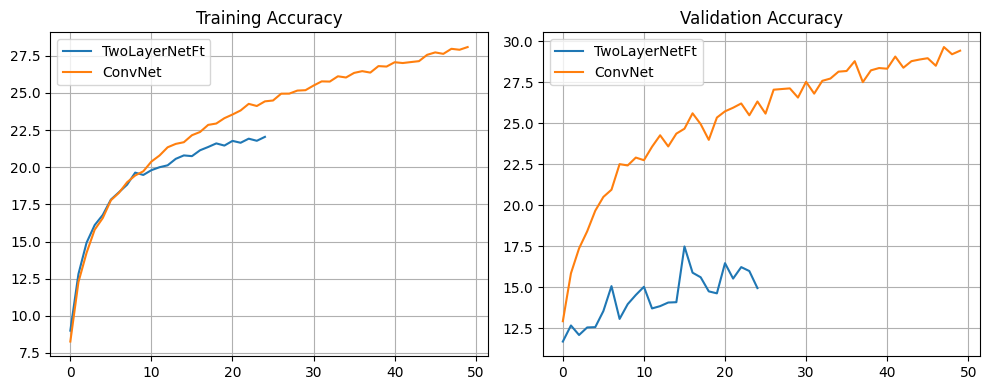

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(two_layer_ft_train_acc, label='TwoLayerNetFt')
plt.plot(conv_net_train_acc, label='ConvNet')
plt.title('Training Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(two_layer_ft_val_acc, label='TwoLayerNetFt')
plt.plot(conv_net_val_acc, label='ConvNet')
plt.title('Validation Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

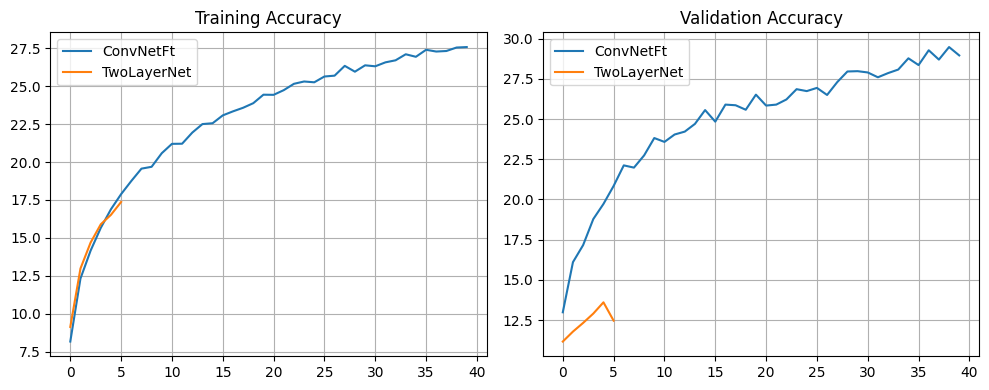

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(conv_net_ft_train_acc, label='ConvNetFt')
plt.plot(two_layer_train_acc, label='TwoLayerNet')
plt.title('Training Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(conv_net_ft_val_acc, label='ConvNetFt')
plt.plot(two_layer_val_acc, label='TwoLayerNet')
plt.title('Validation Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

#### Extended Architectures

In [18]:
class TwoLayerExtendedNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes an extended four-layer fully connected neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the main hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''
        super(TwoLayerExtendedNet, self).__init__()

        # Fully connected layers
        # Layer 1: input → hidden
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Layer 2: hidden → hidden/2
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)

        # Layer 3: hidden/2 → hidden/4
        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)

        # Layer 4: hidden/4 → output (class scores)
        self.fc4 = nn.Linear(hidden_size // 4, num_classes)

        # Dropout for regularization
        self.dropout = nn.Dropout(p=0.3)

        # LeakyReLU activation to prevent dead neurons (slope=0.01)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        # Flatten the input image: (B, 3, 32, 32) → (B, 3072)
        x = x.view(x.size(0), -1)

        # Fully connected layers with LeakyReLU activations
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout(x)

        x = self.leaky_relu(self.fc2(x))
        x = self.dropout(x)

        x = self.leaky_relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [19]:
class ConvExtendedNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the extended convolutional neural network model.

        Args:
            None
        '''
        super(ConvExtendedNet, self).__init__()

        # Convolutional feature extractor
        # Layer C1: input = 3x32x32 → output = 16x28x28 (kernel 5x5)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(16)

        # Layer C2: input = 16x14x14 → output = 32x10x10 (after pooling)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(32)

        # Layer C3: input = 32x5x5 → output = 64x1x1 (after pooling)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.bn3 = nn.BatchNorm2d(64)

        # Layer C4: input = 64x1x1 → output = 120x1x1 (1x1 conv to expand depth)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=120, kernel_size=1)
        self.bn4 = nn.BatchNorm2d(120)

        # Fully connected classifier
        # F5 layer: 120 → 84 (LeNet’s classic F5 size)
        self.fc1 = nn.Linear(120, 84)

        # Additional fully connected layer (F7): 84 → 64
        self.fc2 = nn.Linear(84, 64)

        # F8 (output) layer: 64 → 100 (CIFAR-100 has 100 classes)
        self.fc3 = nn.Linear(64, 100)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        # Convolution + BatchNorm + ReLU + MaxPool
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)   # 32→28→14

        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)   # 14→10→5

        x = F.relu(self.bn3(self.conv3(x)))  # 5→1 (output 64x1x1)
        x = F.relu(self.bn4(self.conv4(x)))  # 1x1 conv to expand to 120x1x1

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # (B,120)

        # Fully connected layers with dropout and ReLU
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))

        # Output layer 
        x = self.fc3(x)
        return x

First, train the TwoLayerExtendedNet model on the CIFAR-100 dataset using the training data loader.

In [20]:
# Model parameters
input_size = 3 * 32 * 32   # 3072 input features
hidden_size = 512           # can be tuned later
num_classes = 100

# Initialize model, loss function, and optimizer
two_layer_extended_net = TwoLayerExtendedNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(two_layer_extended_net, "Adam", learning_rate=0.001)

# Train the network
two_layer_extended_net_train_loss, two_layer_extended_net_val_loss, \
two_layer_extended_net_train_acc, two_layer_extended_net_val_acc = train(
    net=two_layer_extended_net,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    val_loader=val_loader,
    patience=5,
    epochs=50,
    early_stopping=True
)

# Load the best model based on validation loss
two_layer_extended_net.load_state_dict(torch.load("best-two-layer-extended-net.pth"))
two_layer_extended_net.eval()

# Validate the network
validate(two_layer_extended_net, test_loader)
validate_per_class(two_layer_extended_net, test_loader, classes)

Using ADAM optimizer | LR=0.001, Weight Decay=0.0, Momentum=0.9


Epoch [1/50]:   0%|          | 0/704 [00:00<?, ?it/s]

Epoch [1/50] - Train Loss: 4.1712 | Train Acc: 6.29%


Validation Loss: 3.8466 | Validation Acc: 10.20%


Epoch [2/50] - Train Loss: 3.9398 | Train Acc: 9.67%


Validation Loss: 3.7833 | Validation Acc: 12.18%


Epoch [3/50] - Train Loss: 3.8509 | Train Acc: 10.87%


Validation Loss: 3.6900 | Validation Acc: 14.62%


Epoch [4/50] - Train Loss: 3.7904 | Train Acc: 11.55%


Validation Loss: 3.6787 | Validation Acc: 15.78%


Epoch [5/50] - Train Loss: 3.7556 | Train Acc: 12.43%


Validation Loss: 3.6279 | Validation Acc: 14.94%


Epoch [6/50] - Train Loss: 3.7303 | Train Acc: 12.61%


Validation Loss: 3.5895 | Validation Acc: 14.94%


Epoch [7/50] - Train Loss: 3.7044 | Train Acc: 13.14%


Validation Loss: 3.5920 | Validation Acc: 15.40%
No improvement (1/5)


Epoch [8/50] - Train Loss: 3.6816 | Train Acc: 13.50%


Validation Loss: 3.5881 | Validation Acc: 15.90%


Epoch [9/50] - Train Loss: 3.6649 | Train Acc: 13.65%


Validation Loss: 3.6512 | Validation Acc: 15.40%
No improvement (1/5)


Epoch [10/50] - Train Loss: 3.6466 | Train Acc: 14.08%


Validation Loss: 3.5876 | Validation Acc: 15.92%


Epoch [11/50] - Train Loss: 3.6307 | Train Acc: 14.46%


Validation Loss: 3.5430 | Validation Acc: 16.36%


Epoch [12/50] - Train Loss: 3.6269 | Train Acc: 14.56%


Validation Loss: 3.5906 | Validation Acc: 16.34%
No improvement (1/5)


Epoch [13/50] - Train Loss: 3.6063 | Train Acc: 14.89%


Validation Loss: 3.5247 | Validation Acc: 16.58%


Epoch [14/50] - Train Loss: 3.5990 | Train Acc: 14.88%


Validation Loss: 3.5155 | Validation Acc: 17.68%


Epoch [15/50] - Train Loss: 3.5923 | Train Acc: 15.20%


Validation Loss: 3.5014 | Validation Acc: 17.56%


Epoch [16/50] - Train Loss: 3.5925 | Train Acc: 14.91%


Validation Loss: 3.5236 | Validation Acc: 17.26%
No improvement (1/5)


Epoch [17/50] - Train Loss: 3.5804 | Train Acc: 15.23%


Validation Loss: 3.4896 | Validation Acc: 17.82%


Epoch [18/50] - Train Loss: 3.5695 | Train Acc: 15.45%


Validation Loss: 3.4533 | Validation Acc: 19.02%


Epoch [19/50] - Train Loss: 3.5682 | Train Acc: 15.46%


Validation Loss: 3.5520 | Validation Acc: 16.58%
No improvement (1/5)


Epoch [20/50] - Train Loss: 3.5680 | Train Acc: 15.47%


Validation Loss: 3.4996 | Validation Acc: 16.70%
No improvement (2/5)


Epoch [21/50] - Train Loss: 3.5573 | Train Acc: 15.82%


Validation Loss: 3.5299 | Validation Acc: 16.70%
No improvement (3/5)


Epoch [22/50] - Train Loss: 3.5546 | Train Acc: 15.82%


Validation Loss: 3.4977 | Validation Acc: 17.22%
No improvement (4/5)


Epoch [23/50] - Train Loss: 3.5437 | Train Acc: 15.92%


Validation Loss: 3.4717 | Validation Acc: 18.02%
No improvement (5/5)
Early stopping triggered.
Training complete.
Accuracy of the network on the test images: 17.43 %
Accuracy of apple : 41.00 %
Accuracy of aquarium_fish : 37.00 %
Accuracy of baby  : 11.00 %
Accuracy of bear  : 12.00 %
Accuracy of beaver : 2.00 %
Accuracy of bed   : 18.00 %
Accuracy of bee   : 19.00 %
Accuracy of beetle : 13.00 %
Accuracy of bicycle : 5.00 %
Accuracy of bottle : 15.00 %
Accuracy of bowl  : 9.00 %
Accuracy of boy   : 3.00 %
Accuracy of bridge : 3.00 %
Accuracy of bus   : 3.00 %
Accuracy of butterfly : 15.00 %
Accuracy of camel : 7.00 %
Accuracy of can   : 18.00 %
Accuracy of castle : 50.00 %
Accuracy of caterpillar : 23.00 %
Accuracy of cattle : 6.00 %
Accuracy of chair : 22.00 %
Accuracy of chimpanzee : 46.00 %
Accuracy of clock : 0.00 %
Accuracy of cloud : 42.00 %
Accuracy of cockroach : 58.00 %
Accuracy of couch : 6.00 %
Accuracy of crab  : 3.00 %
Accuracy of crocodile : 1.00 %
Accuracy of cup   : 13

In [ ]:
# Show model's architecture
two_layer_extended_net

TwoLayerExtendedNet(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=100, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)

Finally, train the ConvExtendedNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
# # Initialize ConvExtendedNet, loss function, and optimizer
conv_extended_net = ConvExtendedNet()
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(conv_extended_net, "Adam", learning_rate=0.001)

# Train the network
conv_extended_net_train_loss, conv_extended_net_val_loss, \
conv_extended_net_train_acc, conv_extended_net_val_acc = train(
    net=conv_extended_net,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    val_loader=val_loader,
    patience=5,
    epochs=50,
    early_stopping=True
)

# Load the best model based on validation loss
conv_extended_net.load_state_dict(torch.load("best-conv-extended-net.pth"))
conv_extended_net.eval()

# Validate the network
validate(conv_extended_net, test_loader)
validate_per_class(conv_extended_net, test_loader, classes)

Using ADAM optimizer | LR=0.001, Weight Decay=0.0, Momentum=0.9


Epoch [1/50]:   0%|          | 0/704 [00:00<?, ?it/s]

Epoch [1/50] - Train Loss: 4.2015 | Train Acc: 5.27%


Validation Loss: 3.7494 | Validation Acc: 10.96%


Epoch [2/50] - Train Loss: 3.8040 | Train Acc: 9.96%


Validation Loss: 3.5332 | Validation Acc: 14.32%


Epoch [3/50] - Train Loss: 3.6255 | Train Acc: 12.93%


Validation Loss: 3.3907 | Validation Acc: 17.62%


Epoch [4/50] - Train Loss: 3.5033 | Train Acc: 15.42%


Validation Loss: 3.1839 | Validation Acc: 21.62%


Epoch [5/50] - Train Loss: 3.4105 | Train Acc: 16.88%


Validation Loss: 3.0196 | Validation Acc: 24.70%


Epoch [6/50] - Train Loss: 3.3355 | Train Acc: 18.57%


Validation Loss: 3.0363 | Validation Acc: 24.90%
No improvement (1/5)


Epoch [7/50] - Train Loss: 3.2824 | Train Acc: 19.57%


Validation Loss: 2.9206 | Validation Acc: 26.92%


Epoch [8/50] - Train Loss: 3.2321 | Train Acc: 20.38%


Validation Loss: 2.8846 | Validation Acc: 27.70%


Epoch [9/50] - Train Loss: 3.1972 | Train Acc: 21.05%


Validation Loss: 2.8656 | Validation Acc: 28.12%


Epoch [10/50] - Train Loss: 3.1721 | Train Acc: 21.62%


Validation Loss: 2.8341 | Validation Acc: 27.90%


Epoch [11/50] - Train Loss: 3.1347 | Train Acc: 22.38%


Validation Loss: 2.8098 | Validation Acc: 28.68%


Epoch [12/50] - Train Loss: 3.1128 | Train Acc: 22.85%


Validation Loss: 2.7616 | Validation Acc: 29.52%


Epoch [13/50] - Train Loss: 3.0962 | Train Acc: 23.07%


Validation Loss: 2.7498 | Validation Acc: 30.26%


Epoch [14/50] - Train Loss: 3.0707 | Train Acc: 23.77%


Validation Loss: 2.7310 | Validation Acc: 30.34%


Epoch [15/50] - Train Loss: 3.0467 | Train Acc: 23.82%


Validation Loss: 2.7088 | Validation Acc: 30.54%


Epoch [16/50] - Train Loss: 3.0294 | Train Acc: 24.56%


Validation Loss: 2.6684 | Validation Acc: 32.40%


Epoch [17/50] - Train Loss: 3.0055 | Train Acc: 25.00%


Validation Loss: 2.6426 | Validation Acc: 32.38%


Epoch [18/50] - Train Loss: 3.0012 | Train Acc: 24.88%


Validation Loss: 2.6570 | Validation Acc: 32.52%
No improvement (1/5)


Epoch [19/50] - Train Loss: 2.9873 | Train Acc: 25.51%


Validation Loss: 2.6475 | Validation Acc: 32.30%
No improvement (2/5)


Epoch [20/50] - Train Loss: 2.9773 | Train Acc: 25.77%


Validation Loss: 2.6786 | Validation Acc: 32.34%
No improvement (3/5)


Epoch [21/50] - Train Loss: 2.9569 | Train Acc: 26.09%


Validation Loss: 2.6287 | Validation Acc: 33.12%


Epoch [22/50] - Train Loss: 2.9522 | Train Acc: 26.04%


Validation Loss: 2.6438 | Validation Acc: 33.24%
No improvement (1/5)


Epoch [23/50] - Train Loss: 2.9488 | Train Acc: 26.20%


Validation Loss: 2.5737 | Validation Acc: 34.50%


Epoch [24/50] - Train Loss: 2.9204 | Train Acc: 26.81%


Validation Loss: 2.5632 | Validation Acc: 34.08%


Epoch [25/50] - Train Loss: 2.9140 | Train Acc: 27.01%


Validation Loss: 2.5447 | Validation Acc: 34.44%


Epoch [26/50] - Train Loss: 2.9032 | Train Acc: 27.32%


Validation Loss: 2.5527 | Validation Acc: 34.76%
No improvement (1/5)


Epoch [27/50] - Train Loss: 2.8944 | Train Acc: 27.45%


Validation Loss: 2.5549 | Validation Acc: 34.00%
No improvement (2/5)


Epoch [28/50] - Train Loss: 2.8847 | Train Acc: 27.64%


Validation Loss: 2.5791 | Validation Acc: 34.24%
No improvement (3/5)


Epoch [29/50] - Train Loss: 2.8793 | Train Acc: 27.80%


Validation Loss: 2.4883 | Validation Acc: 35.60%


Epoch [30/50] - Train Loss: 2.8734 | Train Acc: 28.09%


Validation Loss: 2.5343 | Validation Acc: 35.16%
No improvement (1/5)


Epoch [31/50] - Train Loss: 2.8698 | Train Acc: 27.92%


Validation Loss: 2.5149 | Validation Acc: 35.52%
No improvement (2/5)


Epoch [32/50] - Train Loss: 2.8581 | Train Acc: 28.04%


Validation Loss: 2.5211 | Validation Acc: 35.14%
No improvement (3/5)


Epoch [33/50] - Train Loss: 2.8502 | Train Acc: 28.34%


Validation Loss: 2.5119 | Validation Acc: 35.22%
No improvement (4/5)


Epoch [34/50] - Train Loss: 2.8457 | Train Acc: 28.60%


Validation Loss: 2.4840 | Validation Acc: 36.06%


Epoch [35/50] - Train Loss: 2.8394 | Train Acc: 28.60%


Validation Loss: 2.4975 | Validation Acc: 35.76%
No improvement (1/5)


Epoch [36/50] - Train Loss: 2.8359 | Train Acc: 28.91%


Validation Loss: 2.5062 | Validation Acc: 35.22%
No improvement (2/5)


Epoch [37/50] - Train Loss: 2.8225 | Train Acc: 28.89%


Validation Loss: 2.5007 | Validation Acc: 35.70%
No improvement (3/5)


Epoch [38/50] - Train Loss: 2.8126 | Train Acc: 28.86%


Validation Loss: 2.4701 | Validation Acc: 36.64%


Epoch [39/50] - Train Loss: 2.8083 | Train Acc: 28.92%


Validation Loss: 2.4534 | Validation Acc: 37.02%


Epoch [40/50] - Train Loss: 2.8128 | Train Acc: 29.07%


Validation Loss: 2.4566 | Validation Acc: 36.60%
No improvement (1/5)


Epoch [41/50] - Train Loss: 2.7966 | Train Acc: 29.77%


Validation Loss: 2.4374 | Validation Acc: 37.20%


Epoch [42/50] - Train Loss: 2.7886 | Train Acc: 29.56%
Validation Loss: 2.4514 | Validation Acc: 36.56%
No improvement (1/5)


Epoch [43/50] - Train Loss: 2.7927 | Train Acc: 29.72%


Validation Loss: 2.4389 | Validation Acc: 36.72%
No improvement (2/5)


Epoch [44/50] - Train Loss: 2.7834 | Train Acc: 29.75%


Validation Loss: 2.4523 | Validation Acc: 36.74%
No improvement (3/5)


Epoch [45/50] - Train Loss: 2.7815 | Train Acc: 30.03%


Validation Loss: 2.4323 | Validation Acc: 36.56%


Epoch [46/50] - Train Loss: 2.7848 | Train Acc: 29.80%


Validation Loss: 2.4138 | Validation Acc: 37.16%


Epoch [47/50] - Train Loss: 2.7772 | Train Acc: 29.94%


Validation Loss: 2.4850 | Validation Acc: 36.06%
No improvement (1/5)


Epoch [48/50] - Train Loss: 2.7710 | Train Acc: 29.91%


Validation Loss: 2.4177 | Validation Acc: 37.56%
No improvement (2/5)


Epoch [49/50] - Train Loss: 2.7709 | Train Acc: 30.08%


Validation Loss: 2.4159 | Validation Acc: 37.36%
No improvement (3/5)


Epoch [50/50] - Train Loss: 2.7634 | Train Acc: 30.39%


Validation Loss: 2.4126 | Validation Acc: 38.06%
Training complete.
Accuracy of the network on the test images: 37.63 %
Accuracy of apple : 64.00 %
Accuracy of aquarium_fish : 54.00 %
Accuracy of baby  : 32.00 %
Accuracy of bear  : 7.00 %
Accuracy of beaver : 14.00 %
Accuracy of bed   : 29.00 %
Accuracy of bee   : 36.00 %
Accuracy of beetle : 36.00 %
Accuracy of bicycle : 52.00 %
Accuracy of bottle : 44.00 %
Accuracy of bowl  : 23.00 %
Accuracy of boy   : 26.00 %
Accuracy of bridge : 30.00 %
Accuracy of bus   : 20.00 %
Accuracy of butterfly : 21.00 %
Accuracy of camel : 18.00 %
Accuracy of can   : 37.00 %
Accuracy of castle : 73.00 %
Accuracy of caterpillar : 40.00 %
Accuracy of cattle : 33.00 %
Accuracy of chair : 66.00 %
Accuracy of chimpanzee : 62.00 %
Accuracy of clock : 23.00 %
Accuracy of cloud : 58.00 %
Accuracy of cockroach : 63.00 %
Accuracy of couch : 20.00 %
Accuracy of crab  : 16.00 %
Accuracy of crocodile : 37.00 %
Accuracy of cup   : 66.00 %
Accuracy of dinosaur : 22.00 %

In [ ]:
# Show model's architecture
conv_extended_net

ConvExtendedNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 120, kernel_size=(1, 1), stride=(1, 1))
  (bn4): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=100, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Test the performance of TwoLayerExtendedNet and compare it with the ConvNet model. Provide a detailed explanation of the results.

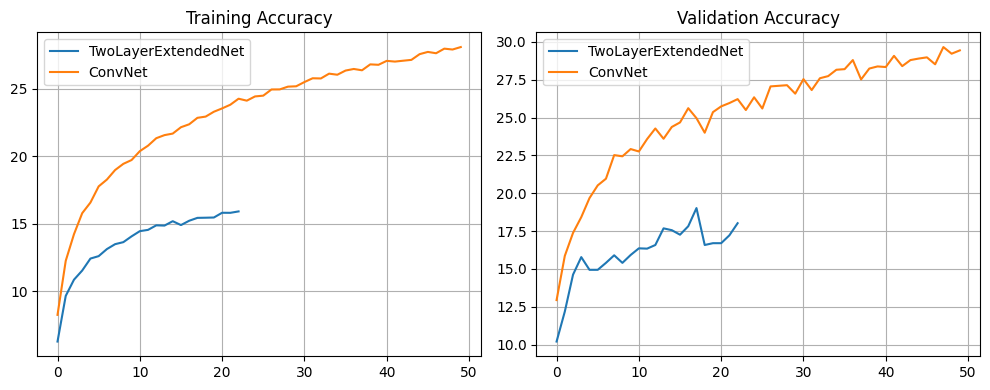

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(two_layer_extended_net_train_acc, label='TwoLayerExtendedNet')
plt.plot(conv_net_train_acc, label='ConvNet')
plt.title('Training Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(two_layer_extended_net_val_acc, label='TwoLayerExtendedNet')
plt.plot(conv_net_val_acc, label='ConvNet')
plt.title('Validation Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

Test the performance of ConvExtendedNet and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

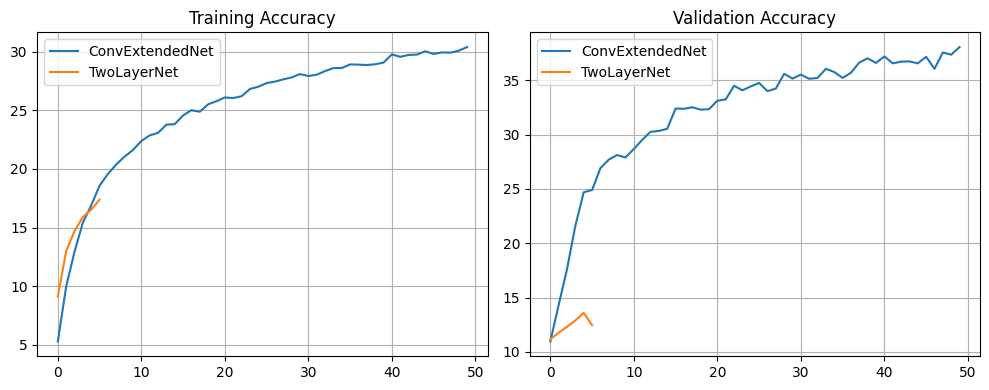

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(conv_extended_net_train_acc, label='ConvExtendedNet')
plt.plot(two_layer_train_acc, label='TwoLayerNet')
plt.title('Training Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(conv_extended_net_val_acc, label='ConvExtendedNet')
plt.plot(two_layer_val_acc, label='TwoLayerNet')
plt.title('Validation Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [211]:
import random

def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # Load STL-10 dataset (train split only for visualization)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ])

    stl10_data = torchvision.datasets.STL10(
        root='./data',
        split='train',
        download=True,
        transform=transform
    )

    # Convert back for visualization (de-normalize)
    def to_numpy_image(tensor):
        img = tensor / 2 + 0.5   # undo normalization
        return np.transpose(img.numpy(), (1, 2, 0))

    # Visualize 5 random images per selected class
    num_classes = len(class_mapping)
    samples_per_class = 5
    fig, axes = plt.subplots(num_classes, samples_per_class,
                             figsize=(samples_per_class * 2.5, num_classes * 2.5))
    fig.suptitle("STL-10: Selected Classes Visualization", fontsize=16, fontweight='bold', y=1.02)

    for row_idx, (class_idx, class_name) in enumerate(class_mapping.items()):
        # Find indices of this class
        class_indices = [i for i, label in enumerate(stl10_data.labels) if label == class_idx]

        # Randomly select a few samples
        selected_indices = random.sample(class_indices, samples_per_class)

        # Plot each image
        for col_idx, img_idx in enumerate(selected_indices):
            img_tensor, _ = stl10_data[img_idx]
            img_np = to_numpy_image(img_tensor)
            ax = axes[row_idx, col_idx]
            ax.imshow(img_np)
            ax.set_title(f"{class_name}", fontsize=9)
            ax.axis("off")

    plt.tight_layout()
    plt.show()

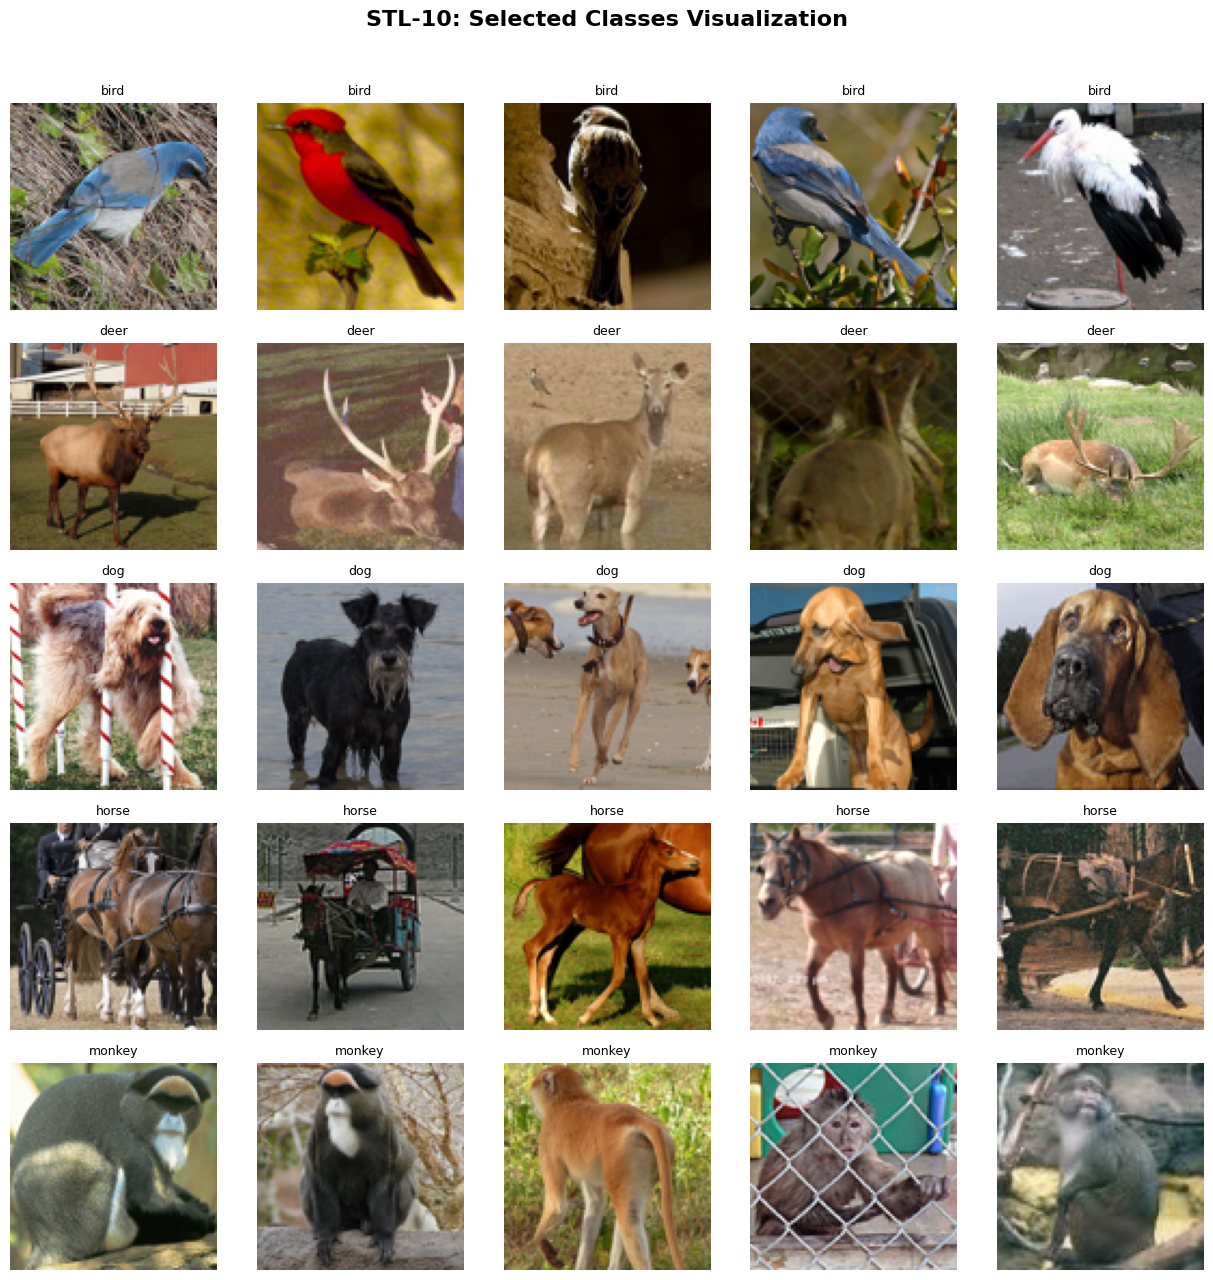

In [212]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [213]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        super(STL10_loader, self).__init__()
        self.transform = transform

        # Determine which split to use
        split = 'train' if train else 'test'

        # Load full STL-10 dataset
        self.dataset = torchvision.datasets.STL10(
            root=root,
            split=split,
            download=True,
            transform=None  # we’ll apply transform manually
        )

        # Define target classes to include (subset)
        # STL-10 original labels (0–9): airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck
        target_classes = [1, 4, 5, 6, 7]  # Bird, Deer, Dog, Horse, Monkey
        self.class_mapping = {1: 0, 4: 1, 5: 2, 6: 3, 7: 4}  # remap to 0–4

        # Filter dataset to keep only selected classes
        self.filtered_indices = [
            idx for idx, label in enumerate(self.dataset.labels)
            if label in target_classes
        ]

        # Keep filtered data and remapped labels
        self.images = [self.dataset.data[i] for i in self.filtered_indices]
        self.labels = [self.class_mapping[self.dataset.labels[i]] for i in self.filtered_indices]

        print(f"Loaded {len(self.images)} images from 5 selected classes (train={train})")
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        return len(self.images)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        image = self.images[idx]
        label = self.labels[idx]

        # Convert from (C, H, W) → (H, W, C)
        if isinstance(image, np.ndarray) and image.shape[0] == 3:
            image = np.transpose(image, (1, 2, 0))

        # Convert numpy array to PIL image
        image = transforms.ToPILImage()(image)

        # Apply transforms if provided
        if self.transform:
            image = self.transform(image)

        return image, label

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [ ]:
from torch.utils.data import DataLoader, Subset
import torchvision.transforms as transforms
import torch

def create_stl10_transforms():
    """
    Creates train, validation, and test transformations for the STL-10 dataset.
    Training includes data augmentation; validation/test only normalization.
    """
    train_transform = transforms.Compose([
        transforms.Resize((32, 32)),  # resize to match CIFAR scale
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomCrop(32, padding=8),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ])

    val_test_transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ])

    return {
        'train': train_transform,
        'validation': val_test_transform,
        'test': val_test_transform
    }

# --- 1. Create transforms ---
stl10_transforms = create_stl10_transforms()

# --- 2. Load STL-10 training set ---
full_stl_dataset = STL10_loader(
    root='./data',
    train=True,
    transform=None,
)

# --- 3. Split indices for train/validation ---
val_ratio = 0.1
train_size = int((1 - val_ratio) * len(full_stl_dataset))
val_size = len(full_stl_dataset) - train_size
generator = torch.Generator().manual_seed(42)
train_indices, val_indices = torch.utils.data.random_split(
    range(len(full_stl_dataset)),
    [train_size, val_size],
    generator=generator
)

# --- 4. Create transformed datasets for each split ---
train_base = STL10_loader(
    root='./data',
    train=True,
    transform=stl10_transforms['train'],
)

val_base = STL10_loader(
    root='./data',
    train=True,
    transform=stl10_transforms['validation'],
)

# Restrict using Subset to keep augmentation only in training
train_stl_dataset = Subset(train_base, train_indices.indices)
val_stl_dataset   = Subset(val_base,   val_indices.indices)

# --- 5. Create test dataset ---
test_stl_dataset = STL10_loader(
    root='./data',
    train=False,
    transform=stl10_transforms['test'],
)

# --- 6. DataLoaders ---
batch_size = 64
train_stl_loader = DataLoader(train_stl_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_stl_loader   = DataLoader(val_stl_dataset,   batch_size=batch_size, shuffle=False, num_workers=2)
test_stl_loader  = DataLoader(test_stl_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

# --- 7. Confirm dataset sizes ---
print(f"Training samples:   {len(train_stl_dataset)}")
print(f"Validation samples: {len(val_stl_dataset)}")
print(f"Testing samples:    {len(test_stl_dataset)}")

Loaded 2500 images from 5 selected classes (train=True)
Loaded 2500 images from 5 selected classes (train=True)
Loaded 2500 images from 5 selected classes (train=True)
Loaded 4000 images from 5 selected classes (train=False)
Training samples:   2250
Validation samples: 250
Testing samples:    4000


In [217]:
# Load pretrained ConvNet and modify final layer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize ConvNet and load pretrained CIFAR-100 weights
conv_net_ft = ConvNet().to(device)
conv_net_ft.load_state_dict(torch.load("best-conv-net.pth", map_location=device), strict=False)

# Modify the final fully connected layer for 5 classes
num_features = conv_net_ft.fc2.in_features  # get input size of last FC
conv_net_ft.fc2 = nn.Linear(num_features, 5).to(device)

print("Loaded pretrained ConvNet and modified final layer for 5 classes.")
conv_net_ft

Loaded pretrained ConvNet and modified final layer for 5 classes.


ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=5, bias=True)
)

In [ ]:
# Define optimizer, loss, and train with early stopping
from sklearn.manifold import TSNE
import seaborn as sns

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_net_ft.parameters(), lr=1e-4, weight_decay=1e-5)
epochs = 30
patience = 5

conv_net_ft_train_losses, conv_net_ft_val_losses = [], []
conv_net_ft_train_accuracies, conv_net_ft_val_accuracies = [], []
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(epochs):
    conv_net_ft.train()
    running_loss, correct_train, total_train = 0.0, 0, 0

    # Training loop
    for images, labels in tqdm(train_stl_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = conv_net_ft(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_stl_loader)
    train_acc = 100 * correct_train / total_train
    conv_net_ft_train_losses.append(avg_train_loss)
    conv_net_ft_train_accuracies.append(train_acc)

    # Validation loop
    conv_net_ft.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_stl_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = conv_net_ft(images)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_stl_loader)
    val_acc = 100 * correct_val / total_val
    conv_net_ft_val_losses.append(avg_val_loss)
    conv_net_ft_val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f} | "
          f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(conv_net_ft.state_dict(), "conv-net-finetuned-stl10.pth")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

print("Fine-tuning complete.")

Epoch [1/30] | Train Loss: 1.6710, Val Loss: 1.6879 | Train Acc: 20.40%, Val Acc: 16.40%


Epoch [2/30] | Train Loss: 1.6286, Val Loss: 1.6485 | Train Acc: 22.36%, Val Acc: 21.60%


Epoch [3/30] | Train Loss: 1.5939, Val Loss: 1.6196 | Train Acc: 25.96%, Val Acc: 22.80%


Epoch [4/30] | Train Loss: 1.5714, Val Loss: 1.5957 | Train Acc: 28.76%, Val Acc: 24.00%


Epoch [5/30] | Train Loss: 1.5585, Val Loss: 1.5765 | Train Acc: 30.58%, Val Acc: 29.60%


Epoch [6/30] | Train Loss: 1.5384, Val Loss: 1.5592 | Train Acc: 33.82%, Val Acc: 32.40%


Epoch [7/30] | Train Loss: 1.5116, Val Loss: 1.5433 | Train Acc: 34.31%, Val Acc: 34.80%


Epoch [8/30] | Train Loss: 1.5042, Val Loss: 1.5251 | Train Acc: 36.53%, Val Acc: 34.40%


Epoch [9/30] | Train Loss: 1.4925, Val Loss: 1.5139 | Train Acc: 36.98%, Val Acc: 34.40%


Epoch [10/30] | Train Loss: 1.4791, Val Loss: 1.5026 | Train Acc: 37.07%, Val Acc: 34.40%


Epoch [11/30] | Train Loss: 1.4829, Val Loss: 1.4913 | Train Acc: 37.91%, Val Acc: 38.00%


Epoch [12/30] | Train Loss: 1.4715, Val Loss: 1.4778 | Train Acc: 38.40%, Val Acc: 38.80%


Epoch [13/30] | Train Loss: 1.4573, Val Loss: 1.4695 | Train Acc: 39.51%, Val Acc: 39.60%


Epoch [14/30] | Train Loss: 1.4501, Val Loss: 1.4602 | Train Acc: 39.73%, Val Acc: 40.80%


Epoch [15/30] | Train Loss: 1.4562, Val Loss: 1.4546 | Train Acc: 40.00%, Val Acc: 41.20%


Epoch [16/30] | Train Loss: 1.4438, Val Loss: 1.4537 | Train Acc: 40.09%, Val Acc: 40.40%


Epoch [17/30] | Train Loss: 1.4333, Val Loss: 1.4406 | Train Acc: 40.93%, Val Acc: 40.80%


Epoch [18/30] | Train Loss: 1.4279, Val Loss: 1.4362 | Train Acc: 42.27%, Val Acc: 42.00%


Epoch [19/30] | Train Loss: 1.4309, Val Loss: 1.4295 | Train Acc: 41.96%, Val Acc: 42.00%


Epoch [20/30] | Train Loss: 1.4111, Val Loss: 1.4249 | Train Acc: 42.13%, Val Acc: 42.00%


Epoch [21/30] | Train Loss: 1.4180, Val Loss: 1.4217 | Train Acc: 40.71%, Val Acc: 42.80%


Epoch [22/30] | Train Loss: 1.4088, Val Loss: 1.4097 | Train Acc: 42.09%, Val Acc: 43.20%


Epoch [23/30] | Train Loss: 1.3993, Val Loss: 1.4062 | Train Acc: 44.13%, Val Acc: 42.80%


Epoch [24/30] | Train Loss: 1.3990, Val Loss: 1.4115 | Train Acc: 42.18%, Val Acc: 44.00%


Epoch [25/30] | Train Loss: 1.3927, Val Loss: 1.3983 | Train Acc: 44.00%, Val Acc: 43.60%


Epoch [26/30] | Train Loss: 1.3951, Val Loss: 1.4014 | Train Acc: 42.31%, Val Acc: 44.40%


Epoch [27/30] | Train Loss: 1.3705, Val Loss: 1.3939 | Train Acc: 43.51%, Val Acc: 44.00%


Epoch [28/30] | Train Loss: 1.3828, Val Loss: 1.3814 | Train Acc: 43.16%, Val Acc: 44.40%


Epoch [29/30] | Train Loss: 1.3877, Val Loss: 1.3858 | Train Acc: 42.36%, Val Acc: 43.60%


Epoch [30/30] | Train Loss: 1.3611, Val Loss: 1.3792 | Train Acc: 44.49%, Val Acc: 43.20%
Fine-tuning complete.


In [ ]:
# Evaluate on STL-10 test set
conv_net_ft.load_state_dict(torch.load("convnet_finetuned_stl10.pth", map_location=device))
conv_net_ft.eval()

correct, total = 0, 0
all_features, all_labels = [], []
with torch.no_grad():
    for images, labels in test_stl_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = conv_net_ft(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # extract features before classification (fc2 activations)
        feats = conv_net_ft.fc2.weight.detach().cpu().numpy()
        all_features.append(feats)
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print(f"Test Accuracy on STL-10 subset: {test_accuracy:.2f}%")

Test Accuracy on STL-10 subset: 46.92%


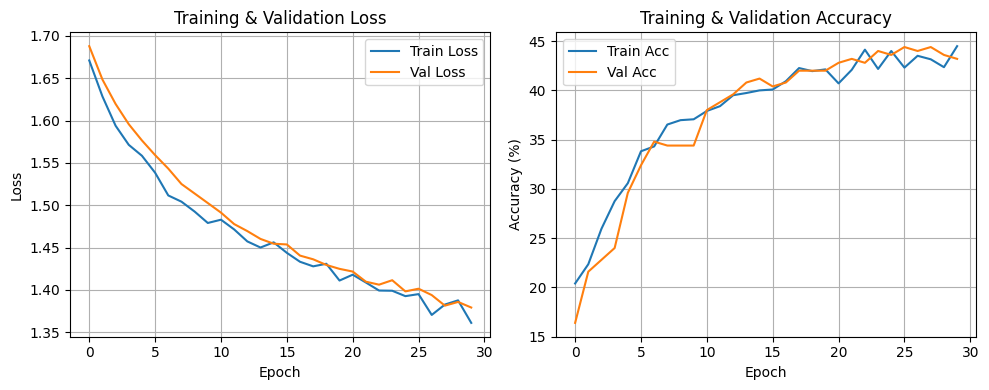

In [ ]:
# Plot Learning Curves (Loss + Accuracy)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(conv_net_ft_train_losses, label='Train Loss')
plt.plot(conv_net_ft_val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training & Validation Loss'); plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(conv_net_ft_train_accuracies, label='Train Acc')
plt.plot(conv_net_ft_val_accuracies, label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)')
plt.title('Training & Validation Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

In [257]:
conv_net_ft

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=5, bias=True)
)

Running t-SNE on fine-tuned ConvNet features...


Extracting features: 100%|██████████| 63/63 [00:01<00:00, 50.56it/s]


Extracted feature shape: (4000, 84)


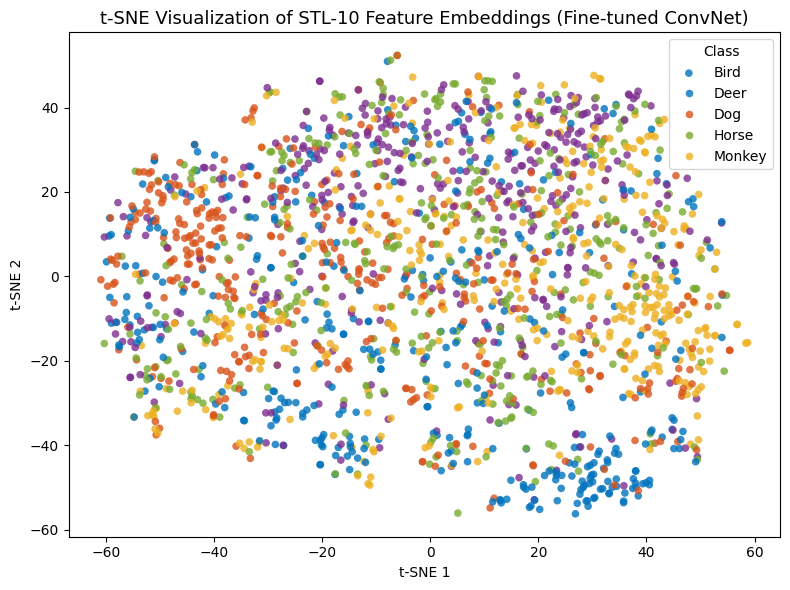

In [ ]:
print("Running t-SNE on fine-tuned ConvNet features...")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# 1. Extract embeddings from fine-tuned ConvNet (up to fc1)
conv_net_ft.eval()
features, labels = [], []

with torch.no_grad():
    for images, lbls in tqdm(test_stl_loader, desc="Extracting features"):
        images = images.to(device)
        
        # Forward pass through the convolutional and first FC layers
        x = F.tanh(conv_net_ft.conv1(images))
        x = F.avg_pool2d(x, 2)

        x = F.tanh(conv_net_ft.conv2(x))
        x = F.avg_pool2d(x, 2)

        x = F.tanh(conv_net_ft.conv3(x))

        # Flatten
        x = x.view(x.size(0), -1)

        # Extract features from fc1 (penultimate layer)
        x = F.tanh(conv_net_ft.fc1(x))
        features.append(x.cpu().numpy())
        labels.extend(lbls.numpy())

features = np.concatenate(features, axis=0)
labels = np.array(labels)
print(f"Extracted feature shape: {features.shape}")

# 2. Normalize + reduce dimensionality with PCA
features_std = StandardScaler().fit_transform(features)
features_pca = PCA(n_components=50, random_state=42).fit_transform(features_std)

# 3. Subsample for clearer visualization
n_samples = min(2000, len(features_pca))
subset_idx = np.random.choice(len(features_pca), size=n_samples, replace=False)
features_subset = features_pca[subset_idx]
labels_subset = labels[subset_idx]

# 4. Run t-SNE on reduced features
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=20,
    learning_rate=200,
    init="pca"
)
features_2d = tsne.fit_transform(features_subset)

# 5. Plot the t-SNE scatter
plt.figure(figsize=(8, 6))

palette = [
    (0.0, 0.45, 0.74),  # bright blue
    (0.85, 0.33, 0.10), # bright red/orange
    (0.47, 0.67, 0.19), # bright green
    (0.93, 0.69, 0.13), # golden yellow
    (0.49, 0.18, 0.56)  # purple
]

sns.scatterplot(
    x=features_2d[:, 0], y=features_2d[:, 1],
    hue=labels_subset,
    palette=palette,
    s=30, alpha=0.8, edgecolor="none"
)

plt.title("t-SNE Visualization of STL-10 Feature Embeddings (Fine-tuned ConvNet)", fontsize=13)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Class", labels=["Bird", "Deer", "Dog", "Horse", "Monkey"], loc="best")
plt.tight_layout()
plt.show()

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [22]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| Ippokratis Pantelidis | 33 % | 34 % | 33 % |
| Andor Károly Bodgál   | 33 % | 33 % | 34 % |
| Robert-Ștefan Sofroni | 34 % | 33 % | 33 % |

### - End of Notebook -